In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels
from pingouin import pairwise_ttests #this is for performing the pairwise tests

In [246]:
poll = pd.read_csv('../data_final/pollution_wide.csv').drop('Unnamed: 0', axis =1)

In [247]:
poll

Location  Date  Carbon monoxide  Nitric Oxide  \
0         Hounslow 2 - Cranford  2004              NaN     19.366907   
1         Hounslow 2 - Cranford  2005              NaN     19.282252   
2         Hounslow 2 - Cranford  2006              NaN     16.322724   
3         Hounslow 2 - Cranford  2007              NaN     22.751626   
4         Hounslow 2 - Cranford  2008              NaN     19.463412   
..                          ...   ...              ...           ...   
790              Oxford High St  2020              NaN           NaN   
791  Oxford St Ebbes (Cal Club)  2020              NaN           NaN   
792      Reading Caversham Road  2020              NaN           NaN   
793         Reading Oxford Road  2020              NaN           NaN   
794           Watford Town Hall  2020              NaN           NaN   

     Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0           35.637110           65.183649  31.628426                22.091612   
1           37.730687           66.993132  34.426010                22.159977   
2           37.439653           62.493307  41.626836                22.695308   
3           34.516199           69.260681  31.764437                21.877800   
4           36.025263           65.728967  36.527434                19.221030   
..                ...                 ...        ...                      ...   
790         28.006868                 NaN        NaN                      NaN   
791               NaN                 NaN  46.380779                      NaN   
792         24.945059                 NaN        NaN                      NaN   
793         19.730862                 NaN        NaN                      NaN   
794         20.813022                 NaN        NaN                      NaN   

     PM10 particulate matter (Hourly measured)  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
..                                         ...   
790                                  15.914070   
791                                        NaN   
792                                  20.666082   
793                                  18.177858   
794                                  13.758945   

     PM2.5 particulate matter (Hourly measured)  Sulphur dioxide       CCG  \
0                                           NaN         3.611565  Hounslow   
1                                           NaN         3.959997  Hounslow   
2                                           NaN         3.018580  Hounslow   
3                                           NaN         2.886371  Hounslow   
4                                           NaN         3.046298  Hounslow   
..                                          ...              ...       ...   
790                                         NaN              NaN    Oxford   
791                                         NaN              NaN    Oxford   
792                                         NaN              NaN   Reading   
793                                         NaN              NaN   Reading   
794                                    7.877282              NaN   Watford   

                               lat/long  distance_from_LHR Radius  
0              [51.4686132, -0.3613471]           6.440137  Inner  
1              [51.4686132, -0.3613471]           6.440137  Inner  
2              [51.4686132, -0.3613471]           6.440137  Inner  
3              [51.4686132, -0.3613471]           6.440137  Inner  
4              [51.4686132, -0.3613471]           6.440137  Inner  
..                                  ...                ...    ...  
790            [51.7520131, -1.2578499]          63.733402  Outer  
791              [51.744856, -1.260338]          63.500050  Outer  
792            [51.4591971, -0.9723

In [248]:
poll1 = poll[~poll.Location.str.contains("Heathrow")]

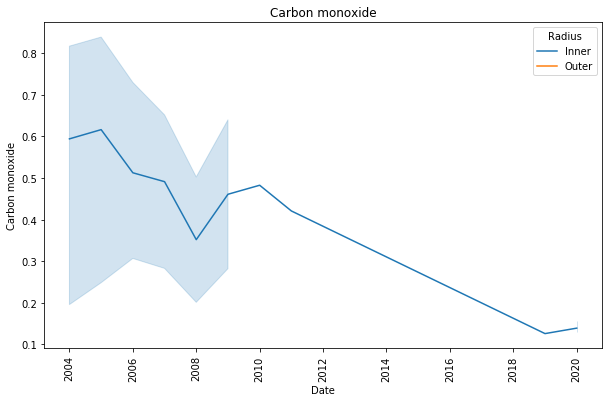

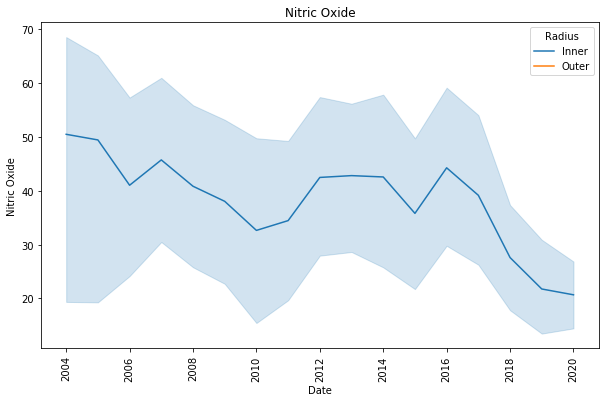

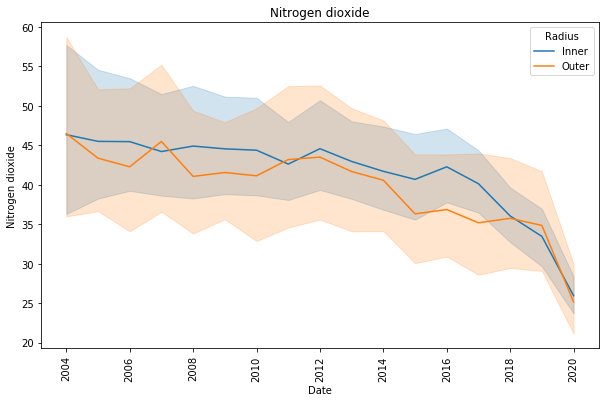

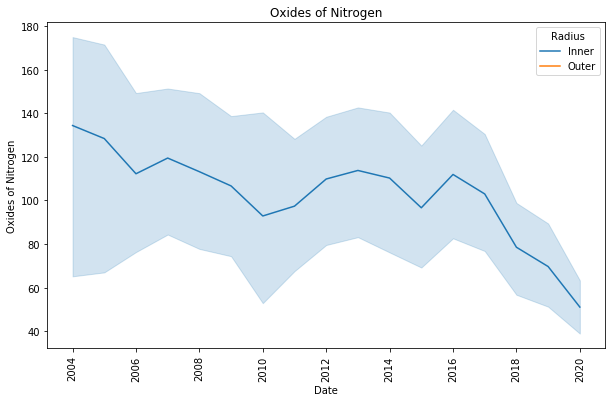

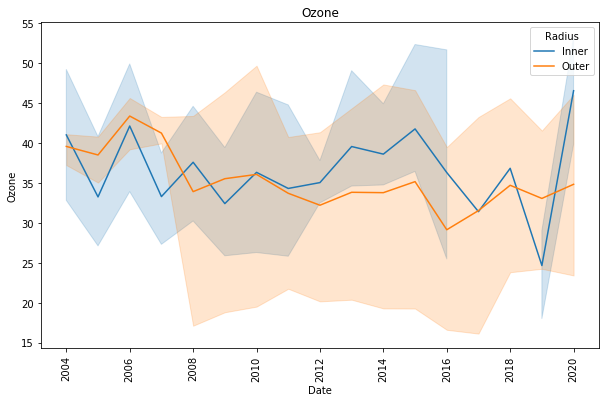

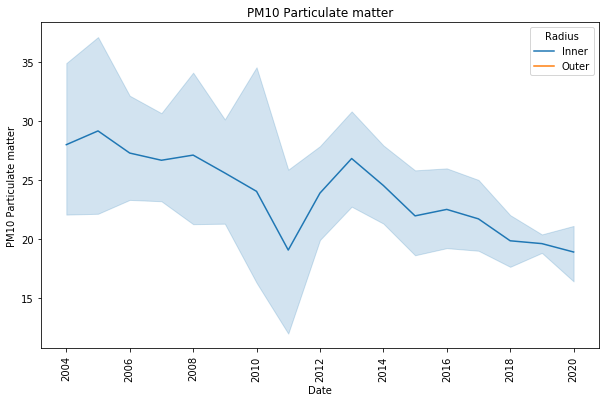

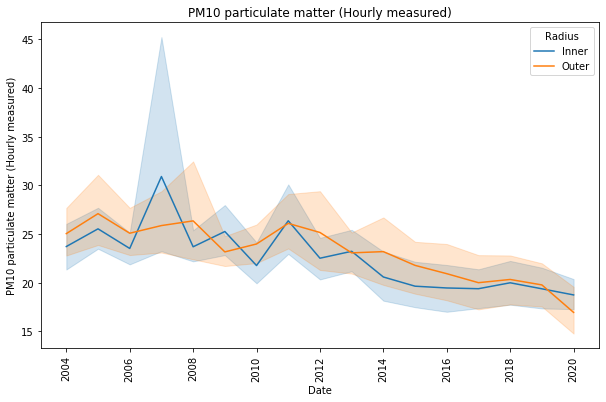

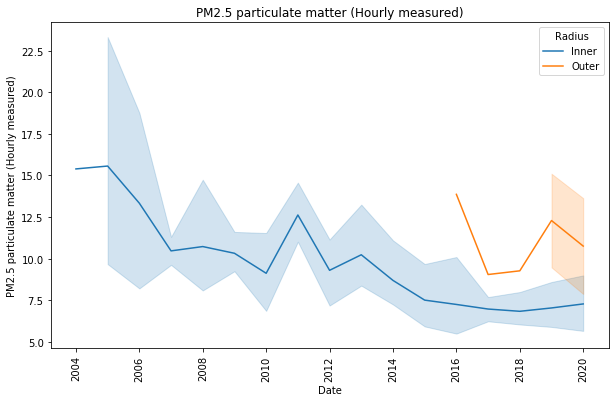

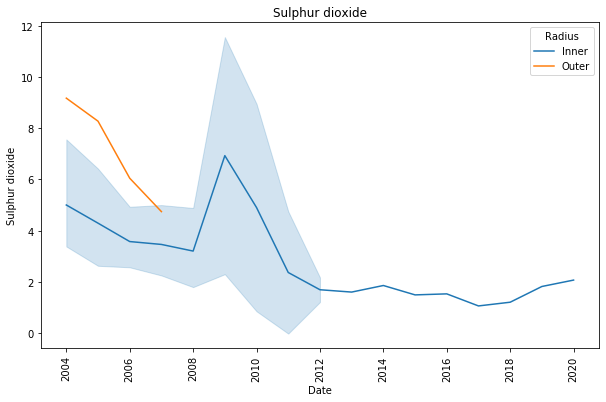

In [249]:
all_polls = list(poll1.drop(['Location', 'Date', 'CCG', 'Radius', 'lat/long', 'distance_from_LHR'], axis = 1).columns)


for p in all_polls:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p,
                 x='Date',
                 hue = 'Radius',
                 data=poll1).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

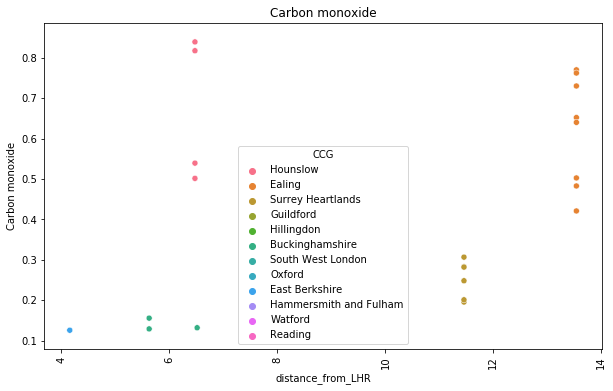

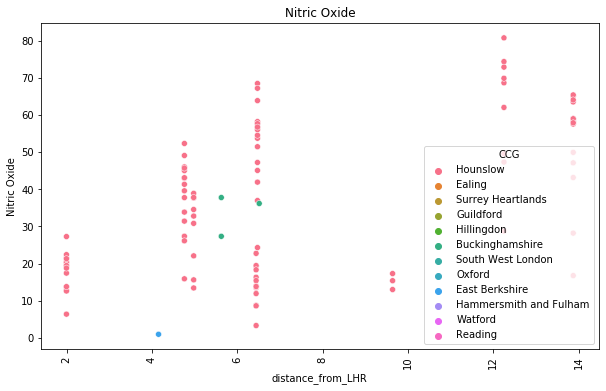

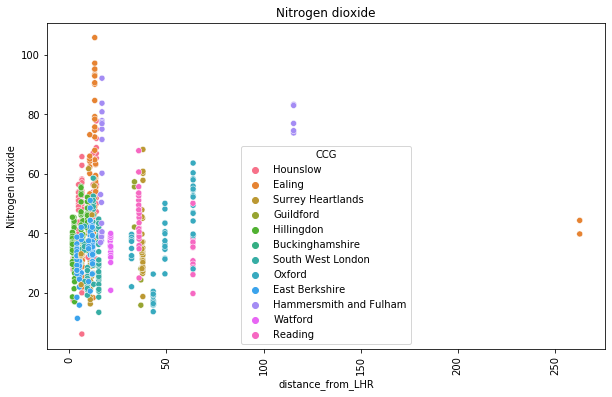

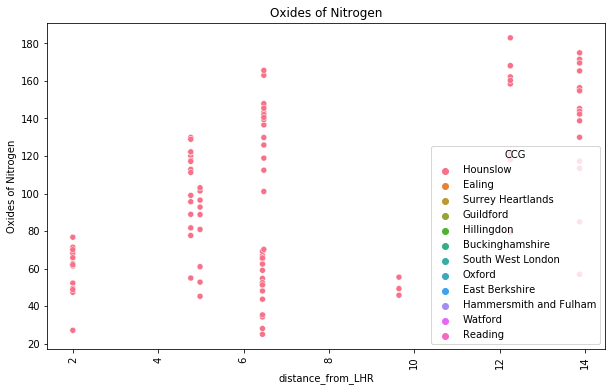

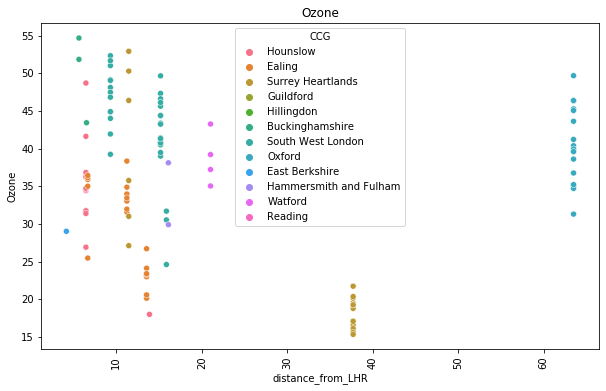

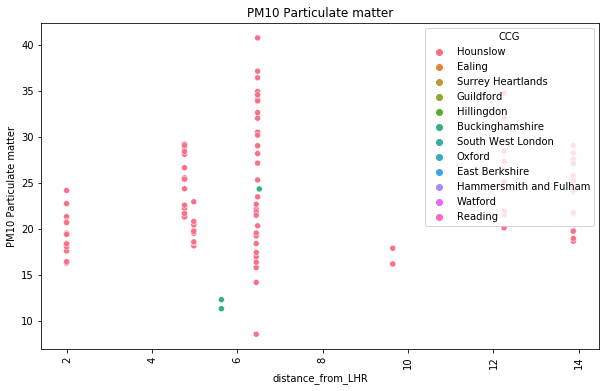

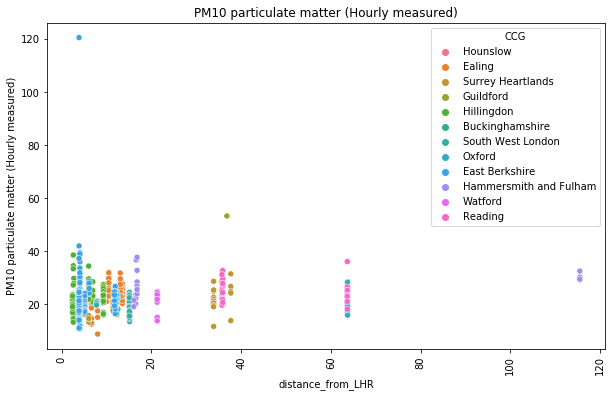

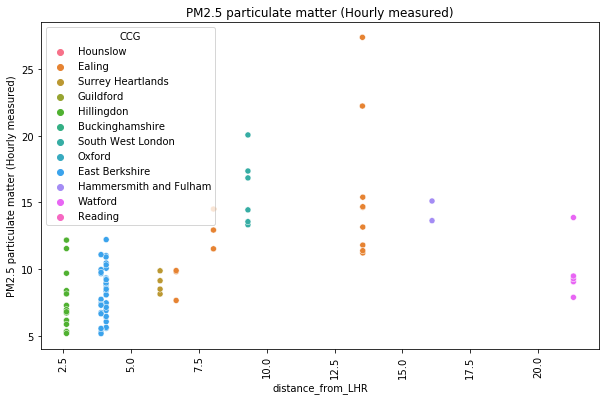

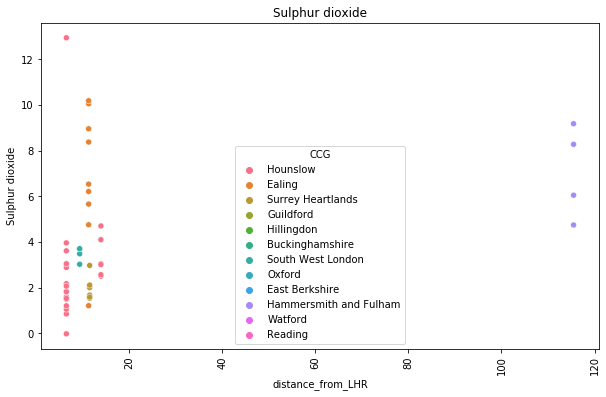

In [250]:
all_polls = list(poll1.drop(['Location', 'Date', 'CCG', 'Radius', 'lat/long', 'distance_from_LHR'], axis = 1).columns)


for p in all_polls:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(y= p,
                 x='distance_from_LHR',
                 hue = 'CCG',
                 data=poll1).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

## Familiarising with Data

In [251]:
healthVpoll_wide = pd.read_csv('../data_final/health_pollution_final_wide.csv').drop('Unnamed: 0', axis =1)
healthVpoll = pd.read_csv('../data_final/health_pollution_final.csv').drop('Unnamed: 0', axis =1)

In [292]:
healthVpoll_wide = healthVpoll_wide[healthVpoll_wide['CCG_Poll_Map'] != 'Hounslow']
healthVpoll = healthVpoll[healthVpoll['CCG_Poll_Map'] != 'Hounslow']

In [252]:
healthVpoll.head()

Year                Area Name  heathrow_distance           CCG_Poll_Map  \
0  2003   NHS Berkshire West CCG        49791.74229                Reading   
1  2003            NHS Brent CCG        16247.54245  No Pollution Readings   
2  2003  NHS Buckinghamshire CCG        38818.06153  No Pollution Readings   
3  2003          NHS Croydon CCG        28645.84070  No Pollution Readings   
4  2003           NHS Ealing CCG        11465.53093                 Ealing   

  Radius Location      LAT     LONG  \
0           Outer  51.4458 -1.16963   
1           Outer  51.5644 -0.27568   
2           Outer  51.7414 -0.80644   
3           Outer  51.3660 -0.07761   
4           Inner  51.5244 -0.31405   

                              Indicator Name  Value      Indicator Type  
0  <75 Coronary Heart Disease Mortality Rate  57.82  Health - Mortality  
1  <75 Coronary Heart Disease Mortality Rate  76.04  Health - Mortality  
2  <75 Coronary Heart Disease Mortality Rate  51.21  Health - Mortality  
3  <75 Coronary Heart Disease Mortality Rate  65.63  Health - Mortality  
4  <75 Coronary Heart Disease Mortality Rate  82.91  Health - Mortality

In [291]:
healthVpoll_wide.CCG_Poll_Map.unique()

array(['Reading', 'No Pollution Readings', 'Ealing', 'East Berkshire',
       'Guildford', 'Hammersmith and Fulham', 'Watford', 'Hillingdon',
       'Hounslow', 'South West London', 'Surrey Heartlands', 'Oxford'],
      dtype=object)

In [254]:
list(healthVpoll.columns.unique())

['Year',
 'Area Name',
 'heathrow_distance',
 'CCG_Poll_Map',
 'Radius Location',
 'LAT',
 'LONG',
 'Indicator Name',
 'Value',
 'Indicator Type']

In [255]:
healthVpoll_wide.dtypes

Year                                           int64
Area Name                                     object
Radius Location                               object
heathrow_distance                            float64
CCG_Poll_Map                                  object
LAT                                          float64
LONG                                         float64
<75 Coronary Heart Disease Mortality Rate    float64
Asthma Admissions Over 19yr                  float64
Asthma Admissions Under 19yr                 float64
Asthma Mortality Rate                        float64
Asthma Prevalence                            float64
Atrial Fibrillation Prevalence               float64
CHD Admissions                               float64
CHD Prevalence                               float64
CKD Prevalence                               float64
COPD (contributory cause) Mortality Rate     float64
COPD Admissions                              float64
COPD Prevalence                              f

## Checking distribution of Data

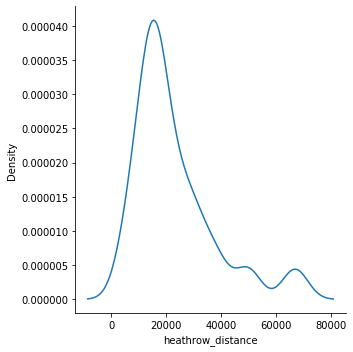

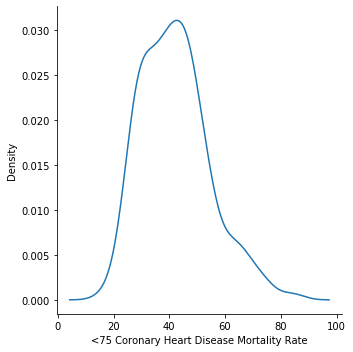

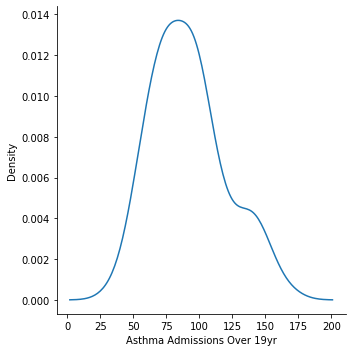

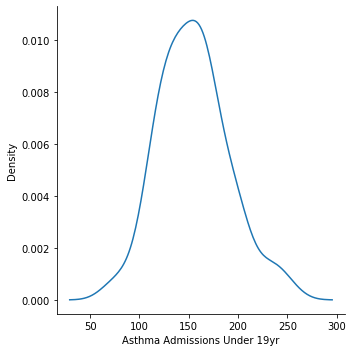

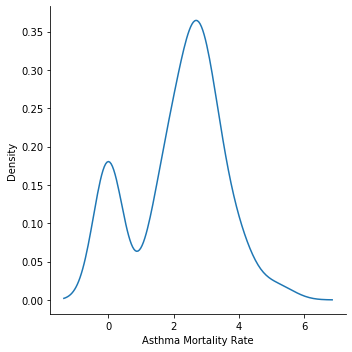

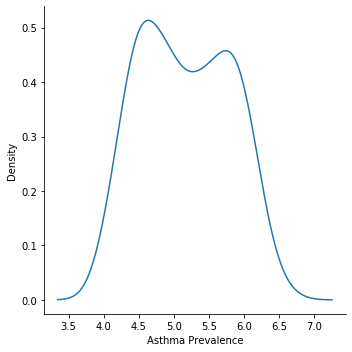

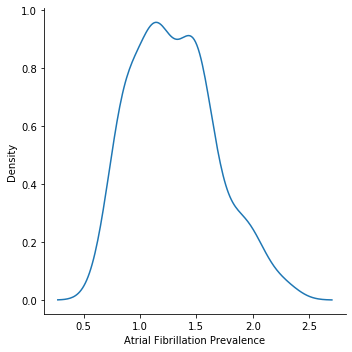

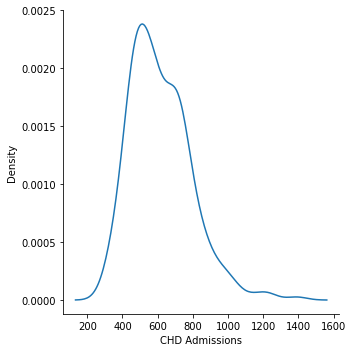

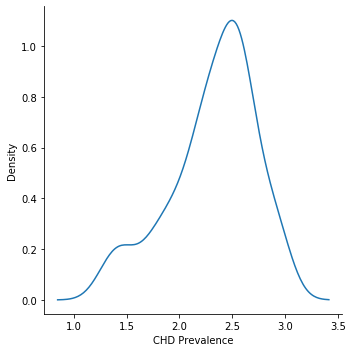

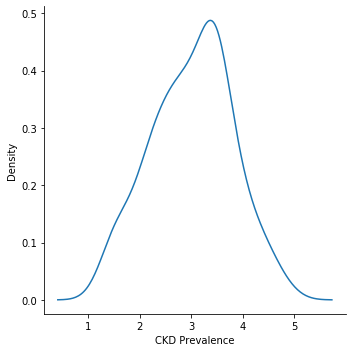

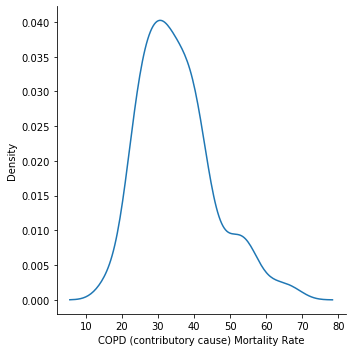

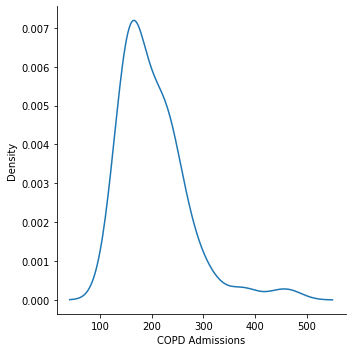

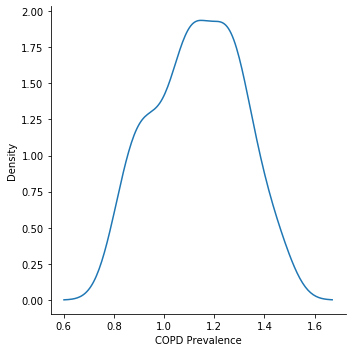

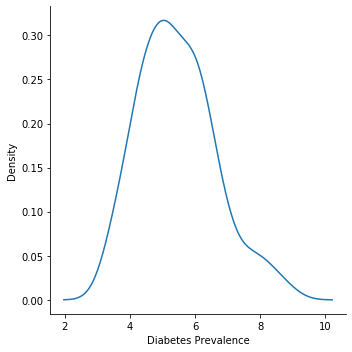

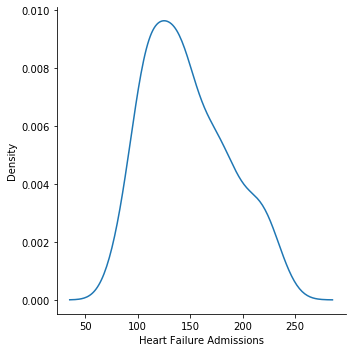

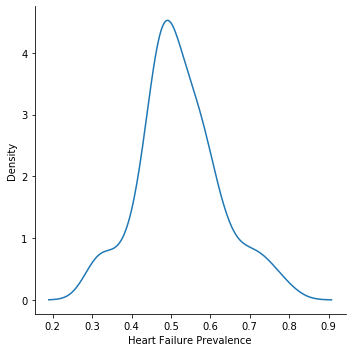

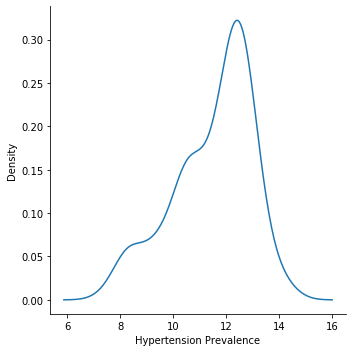

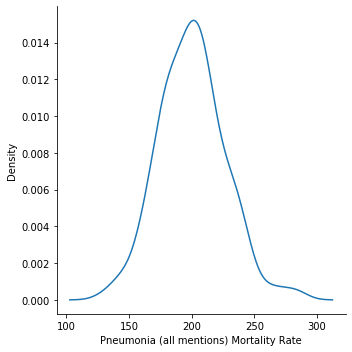

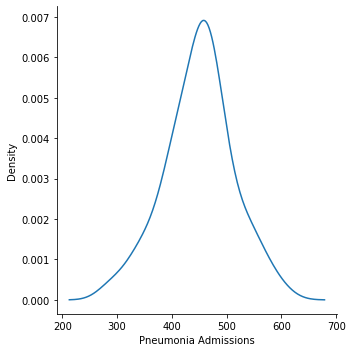

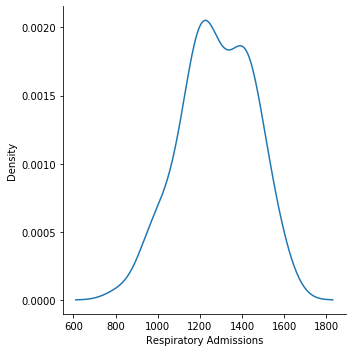

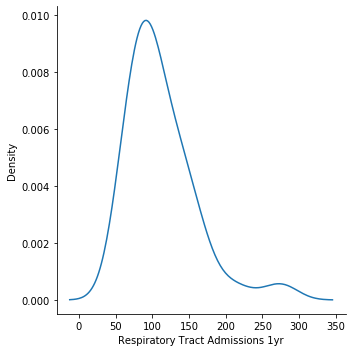

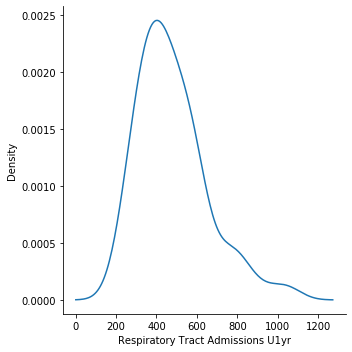

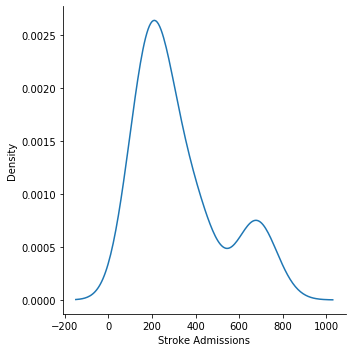

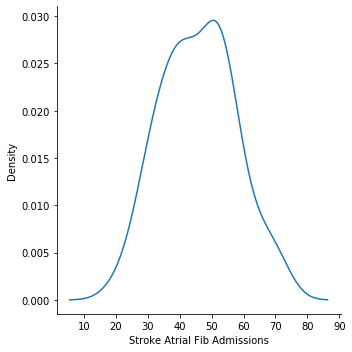

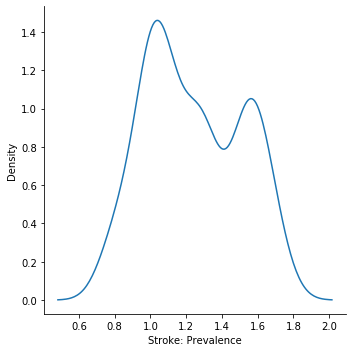

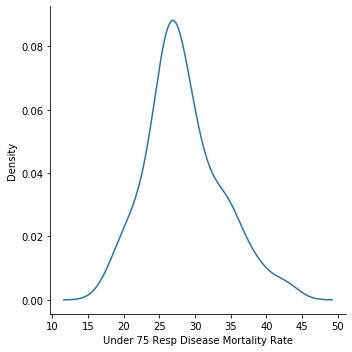

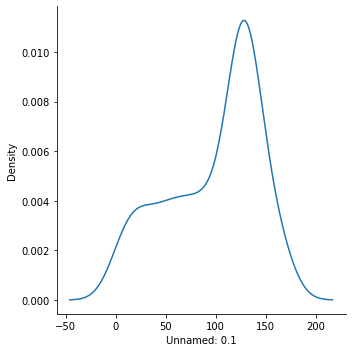

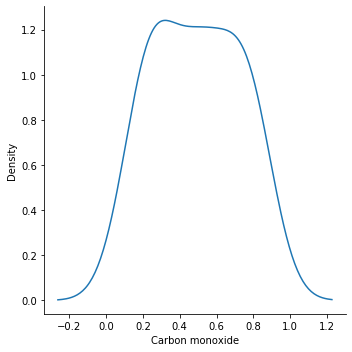

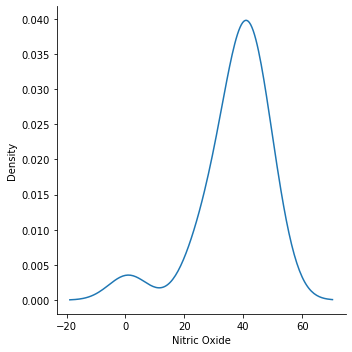

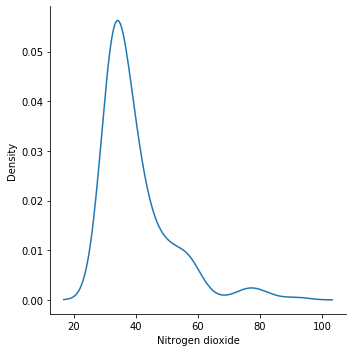

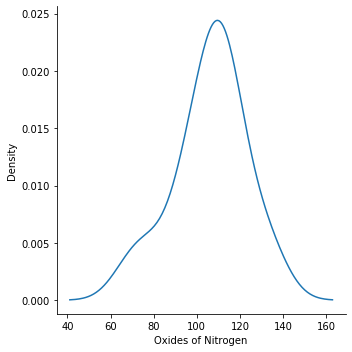

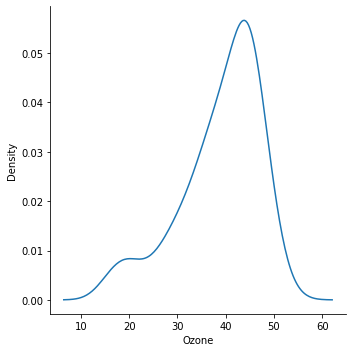

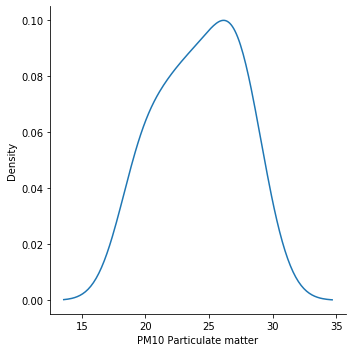

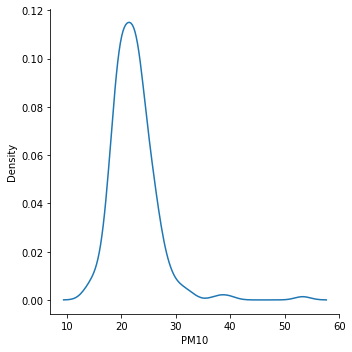

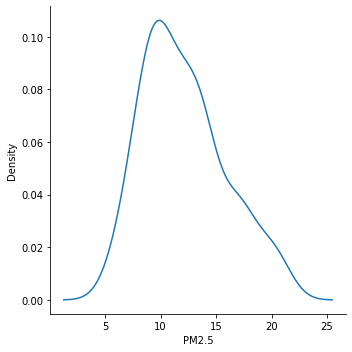

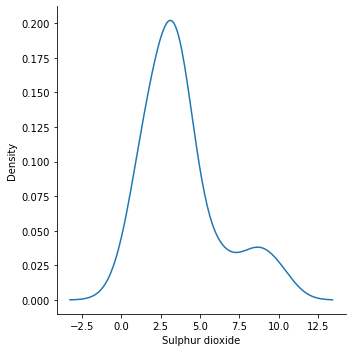

In [256]:
for col in healthVpoll_wide.drop(['CCG_Poll_Map', 'Radius Location', 'Area Name', 'Year', 'LAT', 'LONG'], axis = 1).columns.unique():
    sns.displot(healthVpoll_wide[col], kind='kde')
    plt.show()

#### We can see that most health indicators are normally distributed. However, for the pollutant data, NO2, PM10, Ozone, SO2 seem to be skewed to the left

## Checking Statistical Significance

In [299]:
list(healthVpoll.columns)

['Year',
 'Area Name',
 'heathrow_distance',
 'CCG_Poll_Map',
 'Radius Location',
 'LAT',
 'LONG',
 'Indicator Name',
 'Value',
 'Indicator Type']

In [296]:
for col in healthVpoll_wide.drop(['CCG_Poll_Map', 'Radius Location', 'Area Name', 'Year', 'LAT', 'LONG'], axis = 1).columns.unique():
    print('test for number of {} is :'.format(col), stats.shapiro(healthVpoll_wide[col]))

test for number of heathrow_distance is : (0.8127847909927368, 8.584852111363087e-19)
test for number of <75 Coronary Heart Disease Mortality Rate is : (nan, 1.0)
test for number of Asthma Admissions Over 19yr is : (nan, 1.0)
test for number of Asthma Admissions Under 19yr is : (nan, 1.0)
test for number of Asthma Mortality Rate is : (nan, 1.0)
test for number of Asthma Prevalence is : (nan, 1.0)
test for number of Atrial Fibrillation Prevalence is : (nan, 1.0)
test for number of CHD Admissions is : (nan, 1.0)
test for number of CHD Prevalence is : (nan, 1.0)
test for number of CKD Prevalence is : (nan, 1.0)
test for number of COPD (contributory cause) Mortality Rate is : (nan, 1.0)
test for number of COPD Admissions is : (nan, 1.0)
test for number of COPD Prevalence is : (nan, 1.0)
test for number of Diabetes Prevalence is : (nan, 1.0)
test for number of Heart Failure Admissions is : (nan, 1.0)
test for number of Heart Failure Prevalence is : (nan, 1.0)
test for number of Hypertension

In [303]:
healthVpoll[healthVpoll['Indicator Type'] == 'Air Pollutant']

Year                Area Name  heathrow_distance  \
9296   2003   NHS Berkshire West CCG        49791.74229   
9297   2003            NHS Brent CCG        16247.54245   
9298   2003  NHS Buckinghamshire CCG        38818.06153   
9299   2003          NHS Croydon CCG        28645.84070   
9300   2003           NHS Ealing CCG        11465.53093   
...     ...                      ...                ...   
11615  2019      NHS Oxfordshire CCG        66982.40789   
11616  2019         NHS Richmond CCG        11948.41495   
11617  2019     NHS Surrey Heath CCG        23497.23959   
11618  2019           NHS Sutton CCG        23268.28951   
11619  2019       NHS Wandsworth CCG        17762.40187   

                CCG_Poll_Map Radius Location      LAT     LONG  \
9296                 Reading           Outer  51.4458 -1.16963   
9297   No Pollution Readings           Outer  51.5644 -0.27568   
9298   No Pollution Readings           Outer  51.7414 -0.80644   
9299   No Pollution Readings           Outer  51.3660 -0.07761   
9300                  Ealing           Inner  51.5244 -0.31405   
...                      ...             ...      ...      ...   
11615                 Oxford           Outer  51.7715 -1.29146   
11616      South West London           Inner  51.4403 -0.28911   
11617  No Pollution Readings           Outer  51.3281 -0.70434   
11618      South West London           Outer  51.3576 -0.17227   
11619      South West London           Outer  51.4524 -0.20028   

         Indicator Name  Value Indicator Type  
9296   Nitrogen dioxide    NaN  Air Pollutant  
9297   Nitrogen dioxide    NaN  Air Pollutant  
9298   Nitrogen dioxide    NaN  Air Pollutant  
9299   Nitrogen dioxide    NaN  Air Pollutant  
9300   Nitrogen dioxide    NaN  Air Pollutant  
...                 ...    ...            ...  
11615   Sulphur dioxide    NaN  Air Pollutant  
11616   Sulphur dioxide    NaN  Air Pollutant  
11617   Sulphur dioxide    NaN  Air Pollutant  
11618   Sulphur dioxide    NaN  Air Pollutant  
11619   Sulphur dioxide    NaN  Air Pollutant  

[1575 rows x 10 columns]

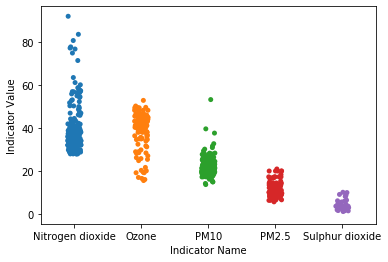

In [304]:
ax = sns.stripplot(x="Indicator Name", y="Value", data=healthVpoll[healthVpoll['Indicator Type'] == 'Air Pollutant'])
plt.ylabel('Indicator Value')
plt.show()

In [317]:
df_wide_comparison.dtypes

Radius Location                               object
heathrow_distance                            float64
<75 Coronary Heart Disease Mortality Rate    float64
Asthma Admissions Over 19yr                  float64
Asthma Admissions Under 19yr                 float64
Asthma Mortality Rate                        float64
Asthma Prevalence                            float64
Atrial Fibrillation Prevalence               float64
CHD Admissions                               float64
CHD Prevalence                               float64
CKD Prevalence                               float64
COPD (contributory cause) Mortality Rate     float64
COPD Admissions                              float64
COPD Prevalence                              float64
Diabetes Prevalence                          float64
Heart Failure Admissions                     float64
Heart Failure Prevalence                     float64
Hypertension Prevalence                      float64
Pneumonia (all mentions) Mortality Rate      f

In [265]:
health_cols = ['<75 Coronary Heart Disease Mortality Rate',
 'Asthma Admissions Over 19yr',
 'Asthma Admissions Under 19yr',
 'Asthma Mortality Rate',
 'Asthma Prevalence',
 'Atrial Fibrillation Prevalence',
 'CHD Admissions',
 'CHD Prevalence',
 'CKD Prevalence',
 'COPD (contributory cause) Mortality Rate',
 'COPD Admissions',
 'COPD Prevalence',
 'Diabetes Prevalence',
 'Heart Failure Admissions',
 'Heart Failure Prevalence',
 'Hypertension Prevalence',
 'Pneumonia (all mentions) Mortality Rate',
 'Pneumonia Admissions',
 'Respiratory Admissions',
 'Respiratory Tract Admissions 1yr',
 'Respiratory Tract Admissions U1yr',
 'Stroke Admissions',
 'Stroke Atrial Fib Admissions',
 'Stroke: Prevalence',
 'Under 75 Resp Disease Mortality Rate']

In [266]:
poll_cols = ['Nitrogen dioxide',
 'Ozone',
 'PM10',
 'PM2.5',
 'Sulphur dioxide']

In [318]:
df_wide_comparison = healthVpoll_wide.drop(['Year',
 'Area Name',
 'Radius Location',
 'CCG_Poll_Map',
 'LAT',
 'LONG'], axis = 1)

### We are setting 𝛼 to 0.05. If the p-value is smaller than our significance level ( 𝑝<𝛼 ) we reject  𝐻0  and we claim that the observed difference is "statistically significant".

In [346]:
stat_sig = []

for h in healthVpoll_wide[health_cols]:
    for p in healthVpoll_wide[poll_cols]:
        try:   
            print("\n")
            print('Outputting regression summary results for {} and {} \n'.format(h, p))
            X = df_wide_comparison[h]
            Y = df_wide_comparison[p]
            X2 = sm.add_constant(X)
            est = sm.OLS(Y, X2, missing='drop')
            est2 = est.fit()
            if est2.pvalues[1] < 0.05:
                stat_sig.append((h,p, est2.pvalues[1]))
            print(est2.summary())
            print("\n")

        except:
            pass



Outputting regression summary results for <75 Coronary Heart Disease Mortality Rate and Nitrogen dioxide 

                            OLS Regression Results                            
Dep. Variable:       Nitrogen dioxide   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     20.68
Date:                Thu, 04 Feb 2021   Prob (F-statistic):           1.00e-05
Time:                        23:01:08   Log-Likelihood:                -680.03
No. Observations:                 179   AIC:                             1364.
Df Residuals:                     177   BIC:                             1370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025    

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                  0.007048
Date:                Thu, 04 Feb 2021   Prob (F-statistic):              0.933
Time:                        23:01:08   Log-Likelihood:                -433.73
No. Observations:                 149   AIC:                             871.5
Df Residuals:                     147   BIC:                             877.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    22.58

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)







Outputting regression summary results for CHD Admissions and Sulphur dioxide 

                            OLS Regression Results                            
Dep. Variable:        Sulphur dioxide   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     9.516
Date:                Thu, 04 Feb 2021   Prob (F-statistic):            0.00384
Time:                        23:01:08   Log-Likelihood:                -84.356
No. Observations:                  39   AIC:                             172.7
Df Residuals:                      37   BIC:                             176.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)







Outputting regression summary results for COPD Admissions and Sulphur dioxide 



Outputting regression summary results for COPD Prevalence and Nitrogen dioxide 

                            OLS Regression Results                            
Dep. Variable:       Nitrogen dioxide   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     5.381
Date:                Thu, 04 Feb 2021   Prob (F-statistic):             0.0221
Time:                        23:01:08   Log-Likelihood:                -473.46
No. Observations:                 120   AIC:                             950.9
Df Residuals:                     118   BIC:                             956.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err     

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.




Outputting regression summary results for Heart Failure Prevalence and PM2.5 

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     38.24
Date:                Thu, 04 Feb 2021   Prob (F-statistic):           3.87e-08
Time:                        23:01:08   Log-Likelihood:                -168.47
No. Observations:                  71   AIC:                             340.9
Df Residuals:                      69   BIC:                             345.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2073
Date:                Thu, 04 Feb 2021   Prob (F-statistic):              0.650
Time:                        23:01:09   Log-Likelihood:                -196.94
No. Observations:                  78   AIC:                             397.9
Df Residuals:                      76   BIC:                             402.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     19

                            OLS Regression Results                            
Dep. Variable:       Nitrogen dioxide   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     13.22
Date:                Thu, 04 Feb 2021   Prob (F-statistic):           0.000388
Time:                        23:01:09   Log-Likelihood:                -547.61
No. Observations:                 142   AIC:                             1099.
Df Residuals:                     140   BIC:                             1105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 56.0435      4

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [360]:
stat_sig_health = []
for i in stat_sig:
    stat_sig_health.append(i[1])

In [363]:
set(stat_sig_health)

{'Nitrogen dioxide', 'Ozone', 'PM10', 'PM2.5', 'Sulphur dioxide'}

In [364]:
stat_sig

[('<75 Coronary Heart Disease Mortality Rate',
  'Nitrogen dioxide',
  1.0039911360327008e-05),
 ('<75 Coronary Heart Disease Mortality Rate', 'PM10', 2.685865130559336e-06),
 ('<75 Coronary Heart Disease Mortality Rate',
  'Sulphur dioxide',
  3.5561059351051515e-07),
 ('Asthma Admissions Over 19yr', 'Nitrogen dioxide', 7.738687850059555e-09),
 ('Asthma Admissions Over 19yr', 'PM10', 0.003155992200975118),
 ('Asthma Mortality Rate', 'Ozone', 0.025953508112840723),
 ('Asthma Mortality Rate', 'PM2.5', 0.0005477284730510738),
 ('Asthma Prevalence', 'Nitrogen dioxide', 0.014051530620397172),
 ('Asthma Prevalence', 'PM2.5', 1.2542903124781422e-05),
 ('Atrial Fibrillation Prevalence', 'Nitrogen dioxide', 6.577918208488424e-06),
 ('Atrial Fibrillation Prevalence', 'Ozone', 5.389851546581044e-05),
 ('Atrial Fibrillation Prevalence', 'PM10', 1.88562627055576e-06),
 ('Atrial Fibrillation Prevalence', 'PM2.5', 6.752979860755006e-06),
 ('CHD Admissions', 'PM10', 0.0058394808768339745),
 ('CHD Adm

## Checking Linear Regression for Heathrow distance 

In [258]:
list(healthVpoll['Indicator Name'].unique())

['<75 Coronary Heart Disease Mortality Rate',
 'Asthma Admissions Over 19yr',
 'Asthma Admissions Under 19yr',
 'Asthma Mortality Rate',
 'Asthma Prevalence',
 'Atrial Fibrillation Prevalence',
 'CHD Admissions',
 'CHD Prevalence',
 'CKD Prevalence',
 'COPD (contributory cause) Mortality Rate',
 'COPD Admissions',
 'COPD Prevalence',
 'Diabetes Prevalence',
 'Heart Failure Admissions',
 'Heart Failure Prevalence',
 'Hypertension Prevalence',
 'Pneumonia (all mentions) Mortality Rate',
 'Pneumonia Admissions',
 'Respiratory Admissions',
 'Respiratory Tract Admissions 1yr',
 'Respiratory Tract Admissions U1yr',
 'Stroke Admissions',
 'Stroke Atrial Fib Admissions',
 'Stroke: Prevalence',
 'Under 75 Resp Disease Mortality Rate',
 'Unnamed: 0',
 'Carbon monoxide',
 'Nitric Oxide',
 'Nitrogen dioxide',
 'Oxides of Nitrogen',
 'Ozone',
 'PM10 Particulate matter',
 'PM10',
 'PM2.5',
 'Sulphur dioxide']

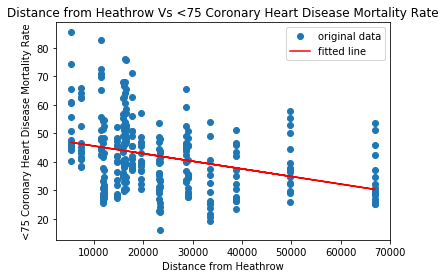

1000kms from Heathrow gives a value of 625.5351670821576 for <75 Coronary Heart Disease Mortality Rate


R-squared: 0.102478
slope confidence (95%): -0.000268 +/- 0.000092




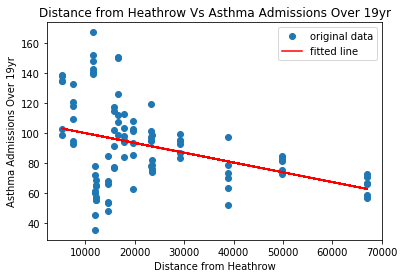

1000kms from Heathrow gives a value of 625.5351670821576 for Asthma Admissions Over 19yr


R-squared: 0.138828
slope confidence (95%): -0.000651 +/- 0.000336




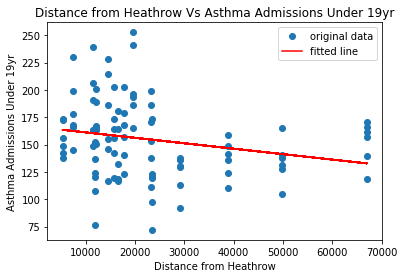

1000kms from Heathrow gives a value of 625.5351670821576 for Asthma Admissions Under 19yr


R-squared: 0.050944
slope confidence (95%): -0.000498 +/- 0.000446




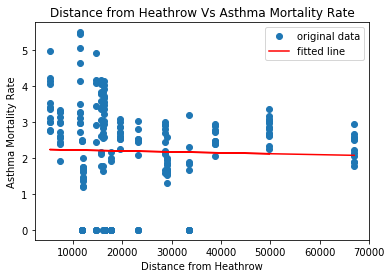

1000kms from Heathrow gives a value of 625.5351670821576 for Asthma Mortality Rate


R-squared: 0.000890
slope confidence (95%): -0.000003 +/- 0.000012




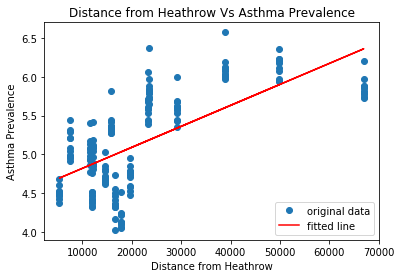

1000kms from Heathrow gives a value of 625.5351670821576 for Asthma Prevalence


R-squared: 0.461247
slope confidence (95%): 0.000027 +/- 0.000004




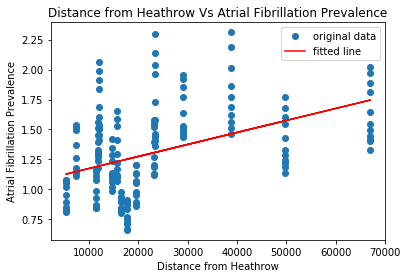

1000kms from Heathrow gives a value of 625.5351670821576 for Atrial Fibrillation Prevalence


R-squared: 0.191448
slope confidence (95%): 0.000010 +/- 0.000003




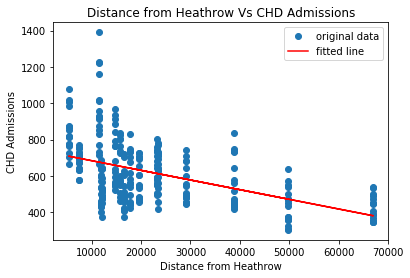

1000kms from Heathrow gives a value of 625.5351670821576 for CHD Admissions


R-squared: 0.238189
slope confidence (95%): -0.005315 +/- 0.001164




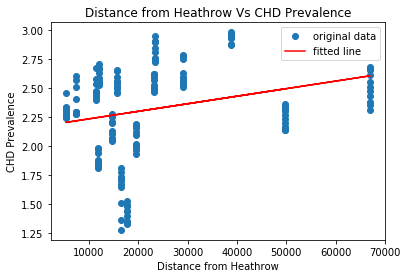

1000kms from Heathrow gives a value of 625.5351670821576 for CHD Prevalence


R-squared: 0.065760
slope confidence (95%): 0.000007 +/- 0.000004




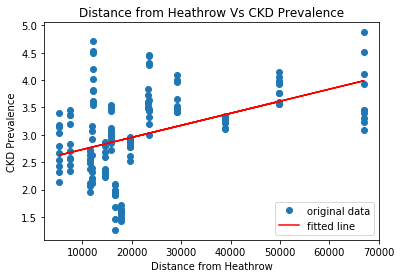

1000kms from Heathrow gives a value of 625.5351670821576 for CKD Prevalence


R-squared: 0.200574
slope confidence (95%): 0.000022 +/- 0.000007




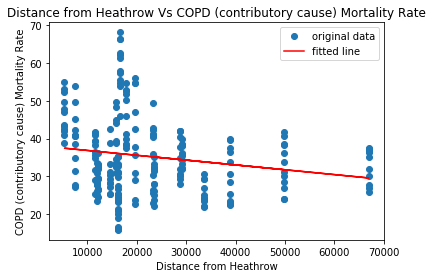

1000kms from Heathrow gives a value of 625.5351670821576 for COPD (contributory cause) Mortality Rate


R-squared: 0.034922
slope confidence (95%): -0.000128 +/- 0.000089




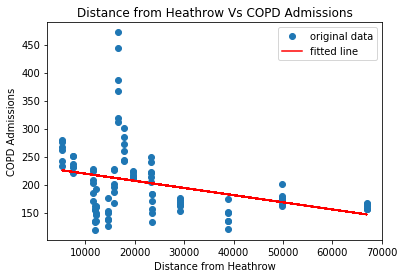

1000kms from Heathrow gives a value of 625.5351670821576 for COPD Admissions


R-squared: 0.099456
slope confidence (95%): -0.001278 +/- 0.000798




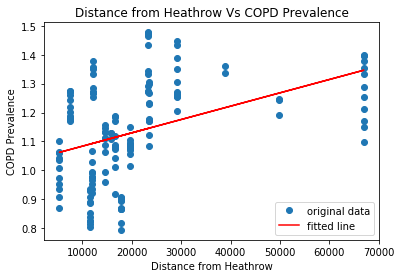

1000kms from Heathrow gives a value of 625.5351670821576 for COPD Prevalence


R-squared: 0.173994
slope confidence (95%): 0.000005 +/- 0.000002




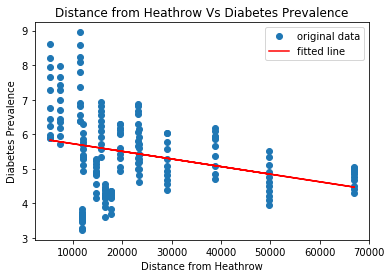

1000kms from Heathrow gives a value of 625.5351670821576 for Diabetes Prevalence


R-squared: 0.089281
slope confidence (95%): -0.000022 +/- 0.000011




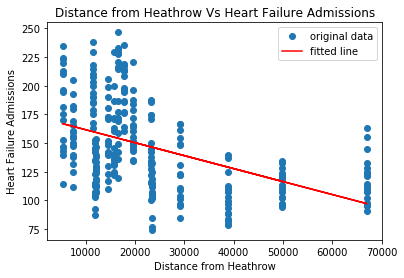

1000kms from Heathrow gives a value of 625.5351670821576 for Heart Failure Admissions


R-squared: 0.206073
slope confidence (95%): -0.001132 +/- 0.000272




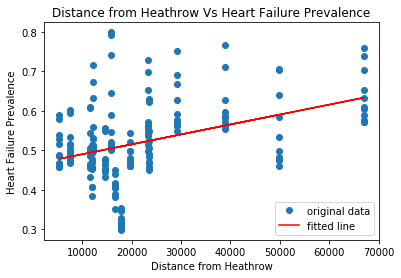

1000kms from Heathrow gives a value of 625.5351670821576 for Heart Failure Prevalence


R-squared: 0.156930
slope confidence (95%): 0.000003 +/- 0.000001




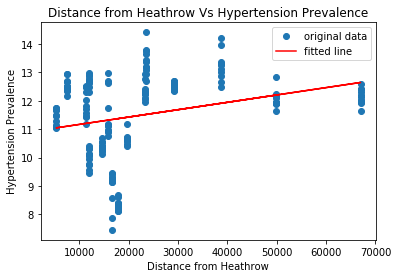

1000kms from Heathrow gives a value of 625.5351670821576 for Hypertension Prevalence


R-squared: 0.078045
slope confidence (95%): 0.000026 +/- 0.000014




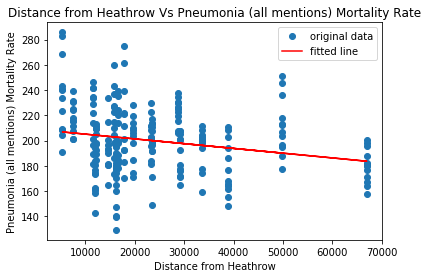

1000kms from Heathrow gives a value of 625.5351670821576 for Pneumonia (all mentions) Mortality Rate


R-squared: 0.045256
slope confidence (95%): -0.000376 +/- 0.000229




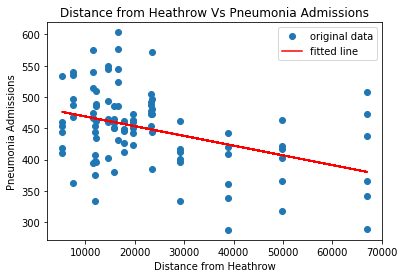

1000kms from Heathrow gives a value of 625.5351670821576 for Pneumonia Admissions


R-squared: 0.159648
slope confidence (95%): -0.001552 +/- 0.000739




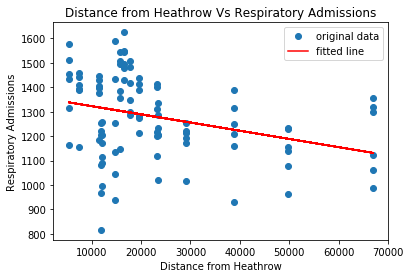

1000kms from Heathrow gives a value of 625.5351670821576 for Respiratory Admissions


R-squared: 0.099589
slope confidence (95%): -0.003356 +/- 0.002094




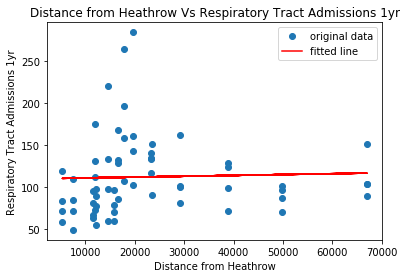

1000kms from Heathrow gives a value of 625.5351670821576 for Respiratory Tract Admissions 1yr


R-squared: 0.001241
slope confidence (95%): 0.000101 +/- 0.000745




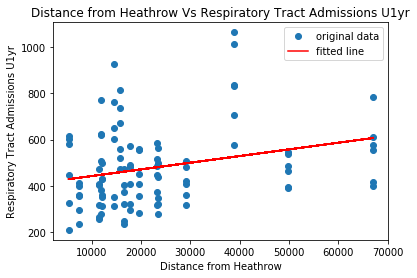

1000kms from Heathrow gives a value of 625.5351670821576 for Respiratory Tract Admissions U1yr


R-squared: 0.071791
slope confidence (95%): 0.002889 +/- 0.002155




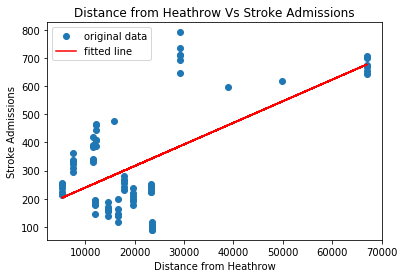

1000kms from Heathrow gives a value of 625.5351670821576 for Stroke Admissions


R-squared: 0.379329
slope confidence (95%): 0.007668 +/- 0.002220




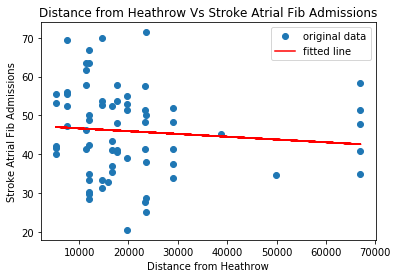

1000kms from Heathrow gives a value of 625.5351670821576 for Stroke Atrial Fib Admissions


R-squared: 0.009121
slope confidence (95%): -0.000072 +/- 0.000185




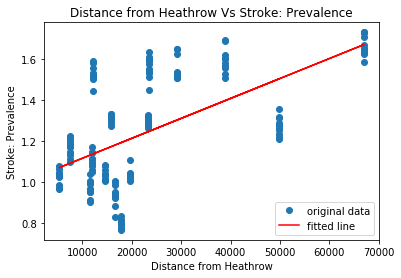

1000kms from Heathrow gives a value of 625.5351670821576 for Stroke: Prevalence


R-squared: 0.341975
slope confidence (95%): 0.000010 +/- 0.000002




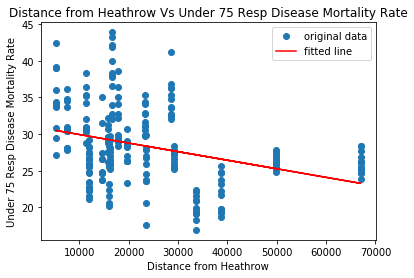

1000kms from Heathrow gives a value of 625.5351670821576 for Under 75 Resp Disease Mortality Rate


R-squared: 0.109579
slope confidence (95%): -0.000117 +/- 0.000044




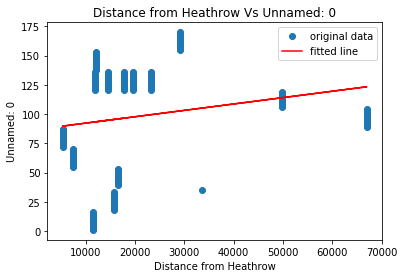

1000kms from Heathrow gives a value of 625.5351670821576 for Unnamed: 0


R-squared: 0.037748
slope confidence (95%): 0.000546 +/- 0.000374




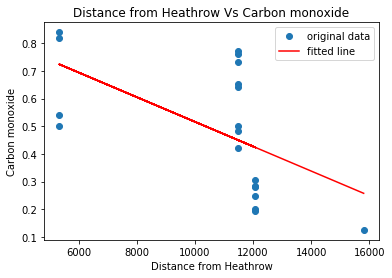

1000kms from Heathrow gives a value of 625.5351670821576 for Carbon monoxide


R-squared: 0.318261
slope confidence (95%): -0.000044 +/- 0.000032




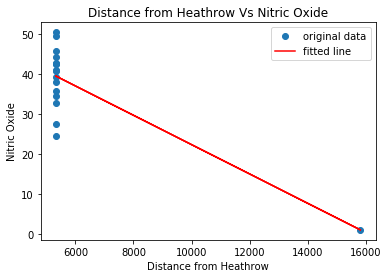

1000kms from Heathrow gives a value of 625.5351670821576 for Nitric Oxide


R-squared: 0.643711
slope confidence (95%): -0.003681 +/- 0.001422




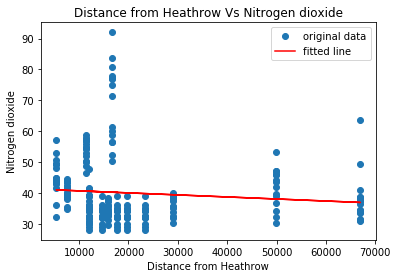

1000kms from Heathrow gives a value of 625.5351670821576 for Nitrogen dioxide


R-squared: 0.009527
slope confidence (95%): -0.000066 +/- 0.000091




/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


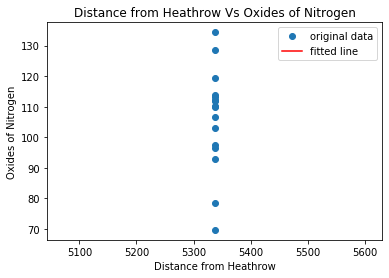

1000kms from Heathrow gives a value of 625.5351670821576 for Oxides of Nitrogen


R-squared: 0.000000
slope confidence (95%): nan +/- inf




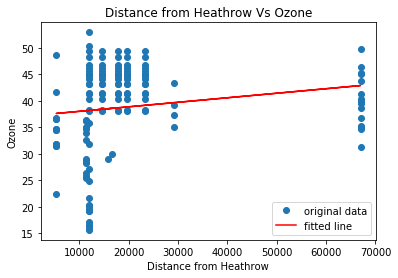

1000kms from Heathrow gives a value of 625.5351670821576 for Ozone


R-squared: 0.031008
slope confidence (95%): 0.000085 +/- 0.000080




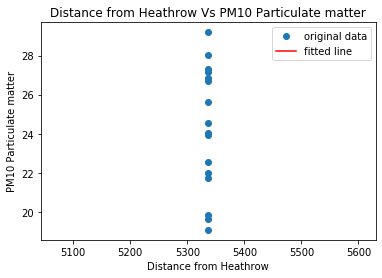

1000kms from Heathrow gives a value of 625.5351670821576 for PM10 Particulate matter


R-squared: 0.000000
slope confidence (95%): nan +/- inf




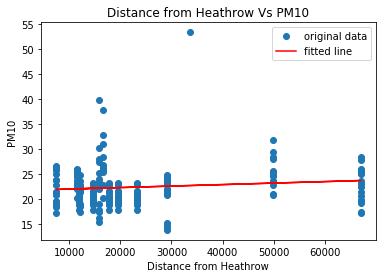

1000kms from Heathrow gives a value of 625.5351670821576 for PM10


R-squared: 0.013444
slope confidence (95%): 0.000030 +/- 0.000036




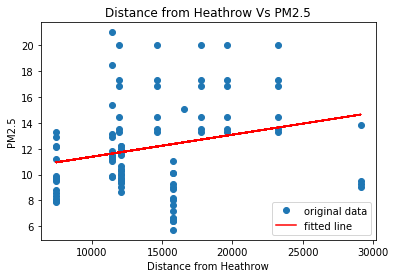

1000kms from Heathrow gives a value of 625.5351670821576 for PM2.5


R-squared: 0.059771
slope confidence (95%): 0.000171 +/- 0.000142




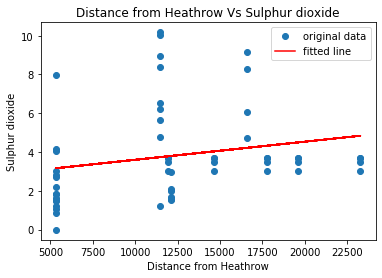

1000kms from Heathrow gives a value of 625.5351670821576 for Sulphur dioxide


R-squared: 0.046948
slope confidence (95%): 0.000093 +/- 0.000116




In [259]:
import matplotlib.pyplot as plt
from scipy import stats

for i in healthVpoll['Indicator Name'].unique():
    x = healthVpoll[healthVpoll['Indicator Name'] == i].dropna()['heathrow_distance'].to_numpy()
    y = healthVpoll[healthVpoll['Indicator Name'] == i].dropna()['Value'].to_numpy()
    
    res = stats.linregress(x, y)
    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
    plt.title("Distance from Heathrow Vs {}".format(i))
    plt.xlabel("Distance from Heathrow")
    plt.ylabel(i)
    plt.legend()
    plt.show()
    print('{0}kms from Heathrow gives a value of {1} for {2}'.format(1000, myfunc(1000), i))
    print('\n')
    print(f"R-squared: {res.rvalue**2:.6f}")
    print(f"slope confidence (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
    print('\n')

In [261]:
list(healthVpoll['Indicator Type'].unique())

['Health - Mortality',
 'Health - Admissions',
 'Health - Prevalence',
 'Air Pollutant']

In [262]:
healthVpoll['Indicator Name'][healthVpoll['Indicator Type'] == 'Air Pollutant'].unique()

array(['Nitrogen dioxide', 'Ozone', 'PM10', 'PM2.5', 'Sulphur dioxide'],
      dtype=object)

In [263]:
healthVpoll['Indicator Name'][healthVpoll['Indicator Type'] != 'Air Pollutant'].unique()

array(['<75 Coronary Heart Disease Mortality Rate',
       'Asthma Admissions Over 19yr', 'Asthma Admissions Under 19yr',
       'Asthma Mortality Rate', 'Asthma Prevalence',
       'Atrial Fibrillation Prevalence', 'CHD Admissions',
       'CHD Prevalence', 'CKD Prevalence',
       'COPD (contributory cause) Mortality Rate', 'COPD Admissions',
       'COPD Prevalence', 'Diabetes Prevalence',
       'Heart Failure Admissions', 'Heart Failure Prevalence',
       'Hypertension Prevalence',
       'Pneumonia (all mentions) Mortality Rate', 'Pneumonia Admissions',
       'Respiratory Admissions', 'Respiratory Tract Admissions 1yr',
       'Respiratory Tract Admissions U1yr', 'Stroke Admissions',
       'Stroke Atrial Fib Admissions', 'Stroke: Prevalence',
       'Under 75 Resp Disease Mortality Rate', 'Unnamed: 0',
       'Carbon monoxide', 'Nitric Oxide', 'Oxides of Nitrogen',
       'PM10 Particulate matter'], dtype=object)

## Checking Linear Regression for all factors

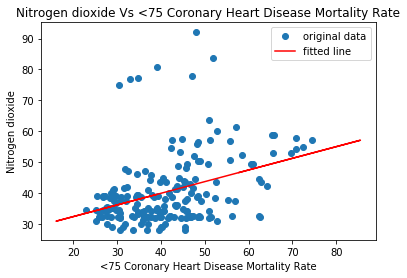

R-squared: 0.132972
slope confidence (95%): 0.377713 +/- 0.139978




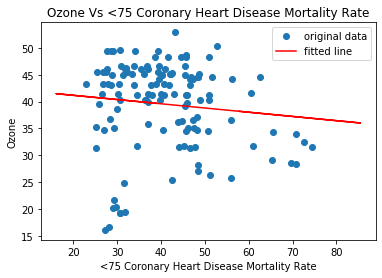

R-squared: 0.011706
slope confidence (95%): -0.078603 +/- 0.128547




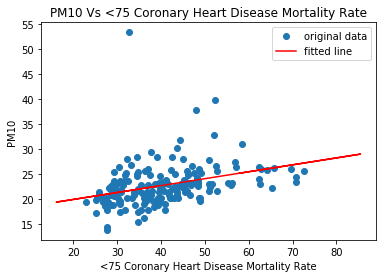

R-squared: 0.117331
slope confidence (95%): 0.138389 +/- 0.057225




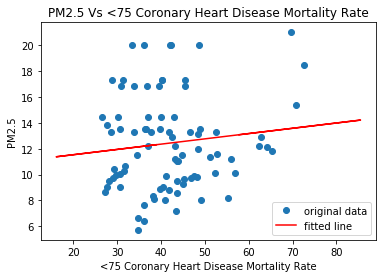

R-squared: 0.013962
slope confidence (95%): 0.040882 +/- 0.075640




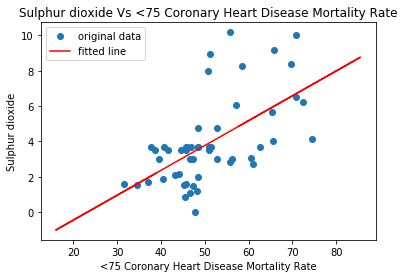

R-squared: 0.349524
slope confidence (95%): 0.140853 +/- 0.053968




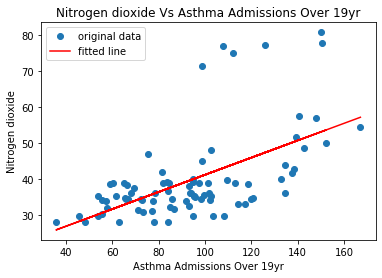

R-squared: 0.328788
slope confidence (95%): 0.237753 +/- 0.075243




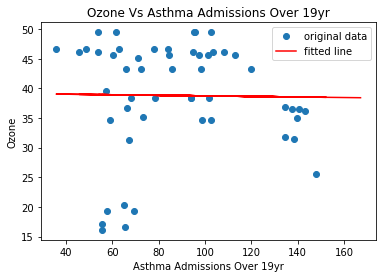

R-squared: 0.000213
slope confidence (95%): -0.004663 +/- 0.090606




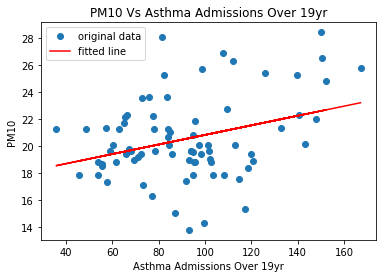

R-squared: 0.109009
slope confidence (95%): 0.035487 +/- 0.023342




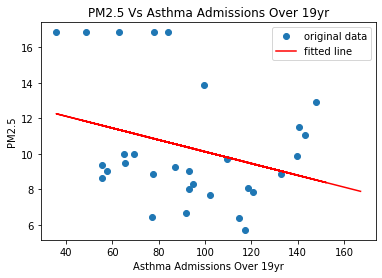

R-squared: 0.089506
slope confidence (95%): -0.033194 +/- 0.040130




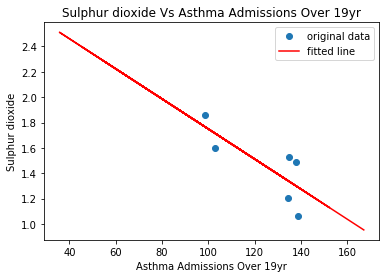

R-squared: 0.590390
slope confidence (95%): -0.011862 +/- 0.009909




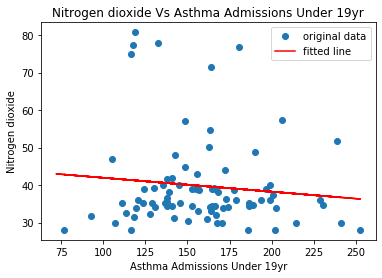

R-squared: 0.011505
slope confidence (95%): -0.037099 +/- 0.076167




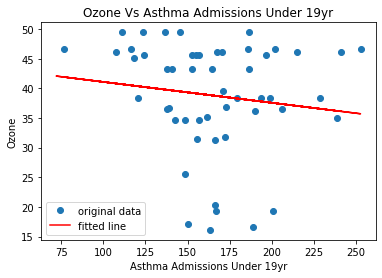

R-squared: 0.017872
slope confidence (95%): -0.035184 +/- 0.073983




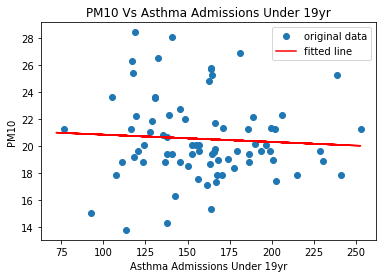

R-squared: 0.004001
slope confidence (95%): -0.005378 +/- 0.019522




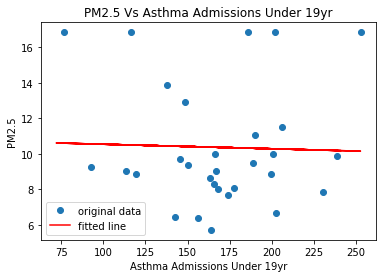

R-squared: 0.000921
slope confidence (95%): -0.002541 +/- 0.031714




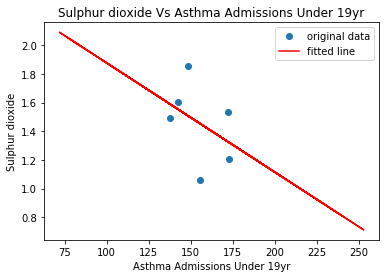

R-squared: 0.159347
slope confidence (95%): -0.007629 +/- 0.017573




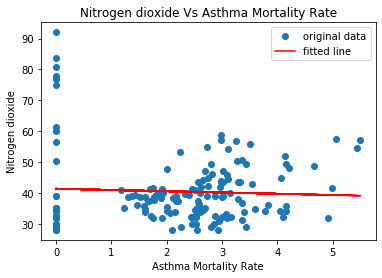

R-squared: 0.002420
slope confidence (95%): -0.408717 +/- 1.319960




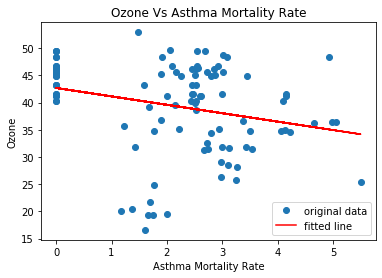

R-squared: 0.071084
slope confidence (95%): -1.545408 +/- 1.114965




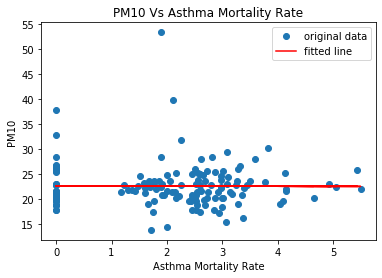

R-squared: 0.000048
slope confidence (95%): -0.022550 +/- 0.538733




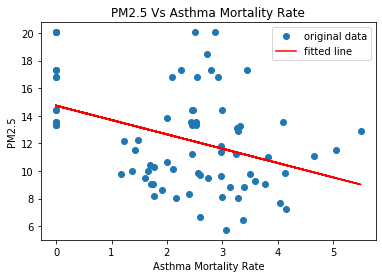

R-squared: 0.148135
slope confidence (95%): -1.039482 +/- 0.577322




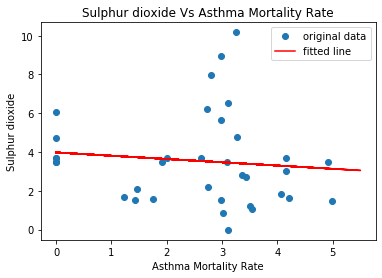

R-squared: 0.011095
slope confidence (95%): -0.168745 +/- 0.556250




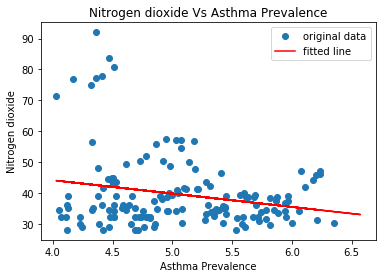

R-squared: 0.048133
slope confidence (95%): -4.318692 +/- 3.134760




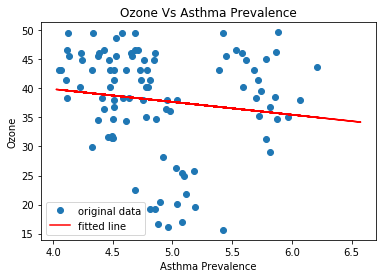

R-squared: 0.018177
slope confidence (95%): -2.210867 +/- 3.326258




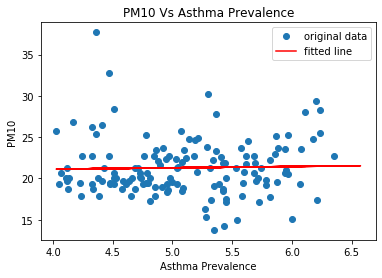

R-squared: 0.000742
slope confidence (95%): 0.158067 +/- 0.983120




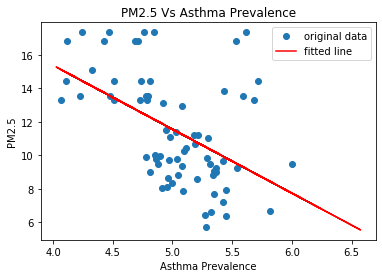

R-squared: 0.243058
slope confidence (95%): -3.818592 +/- 1.627163




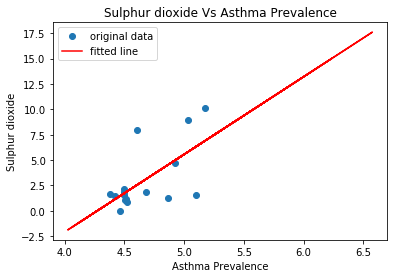

R-squared: 0.400263
slope confidence (95%): 7.652735 +/- 5.021533




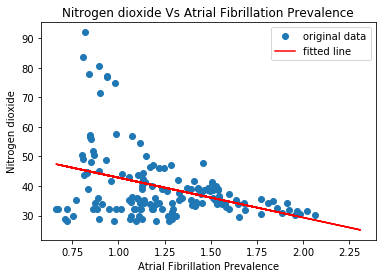

R-squared: 0.143482
slope confidence (95%): -13.494160 +/- 5.381499




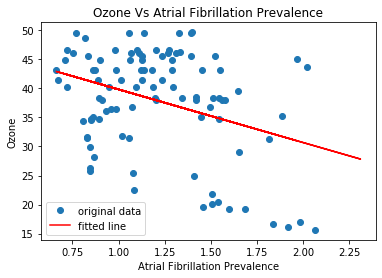

R-squared: 0.121859
slope confidence (95%): -9.151993 +/- 5.029318




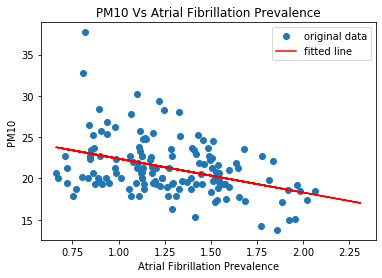

R-squared: 0.150217
slope confidence (95%): -4.093924 +/- 1.650619




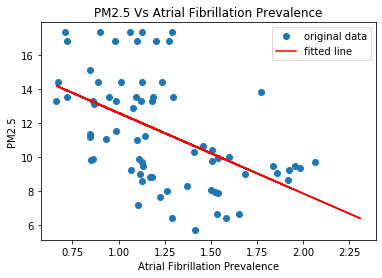

R-squared: 0.256015
slope confidence (95%): -4.735266 +/- 1.949151




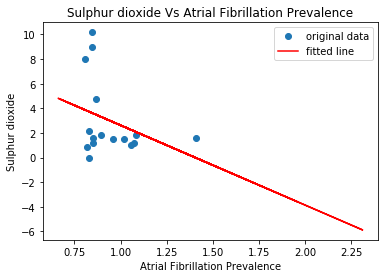

R-squared: 0.104847
slope confidence (95%): -6.479755 +/- 10.149431




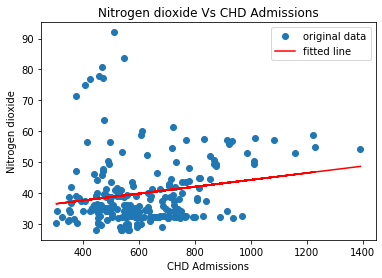

R-squared: 0.033052
slope confidence (95%): 0.011120 +/- 0.008152




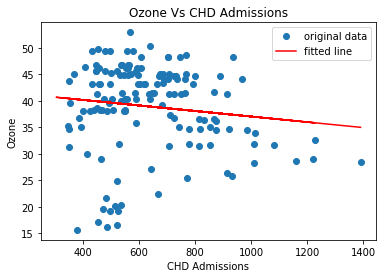

R-squared: 0.015154
slope confidence (95%): -0.005211 +/- 0.006997




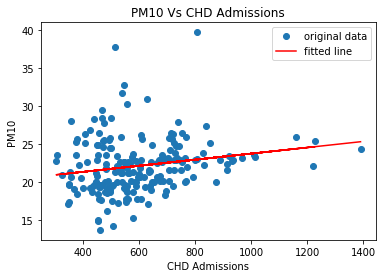

R-squared: 0.037010
slope confidence (95%): 0.003979 +/- 0.002864




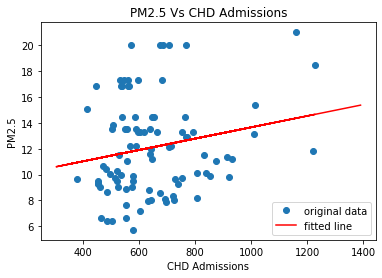

R-squared: 0.039643
slope confidence (95%): 0.004379 +/- 0.004507




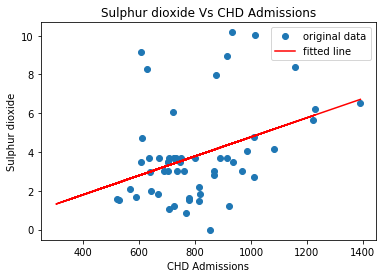

R-squared: 0.142363
slope confidence (95%): 0.004963 +/- 0.003356




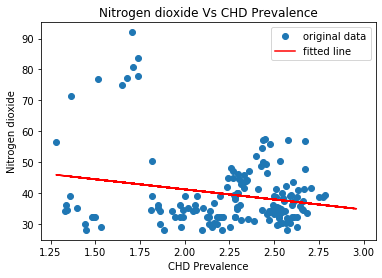

R-squared: 0.043086
slope confidence (95%): -6.542212 +/- 5.032467




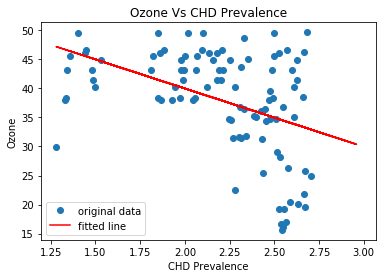

R-squared: 0.183402
slope confidence (95%): -10.025526 +/- 4.330617




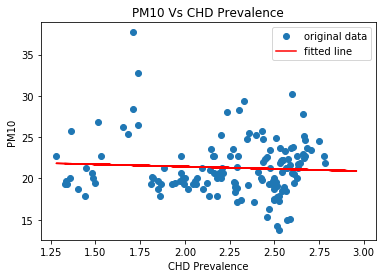

R-squared: 0.003734
slope confidence (95%): -0.549214 +/- 1.520761




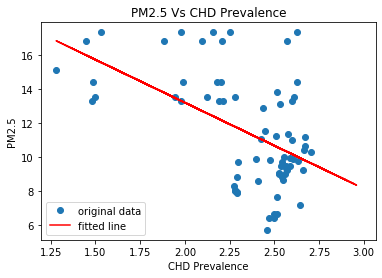

R-squared: 0.273864
slope confidence (95%): -5.059145 +/- 1.989159




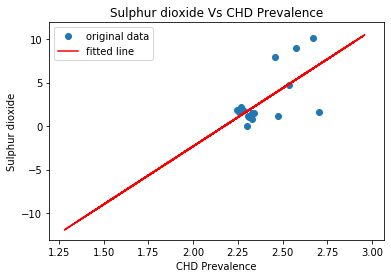

R-squared: 0.401938
slope confidence (95%): 13.354741 +/- 8.732548




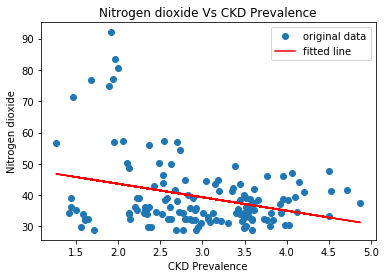

R-squared: 0.088570
slope confidence (95%): -4.302273 +/- 2.365001




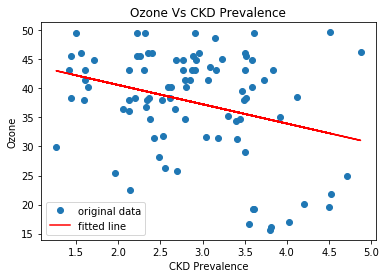

R-squared: 0.093781
slope confidence (95%): -3.320001 +/- 2.219286




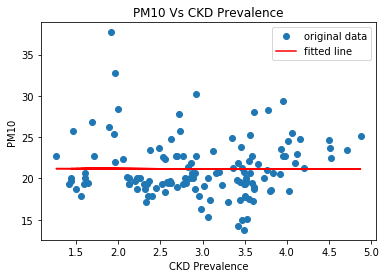

R-squared: 0.000009
slope confidence (95%): -0.013243 +/- 0.774151




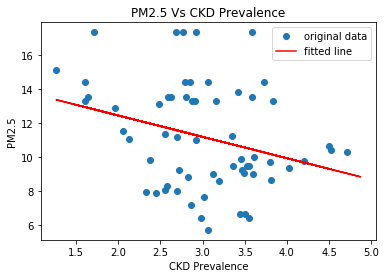

R-squared: 0.088389
slope confidence (95%): -1.255372 +/- 1.043949




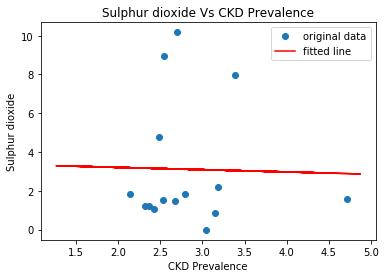

R-squared: 0.000514
slope confidence (95%): -0.116983 +/- 2.868989




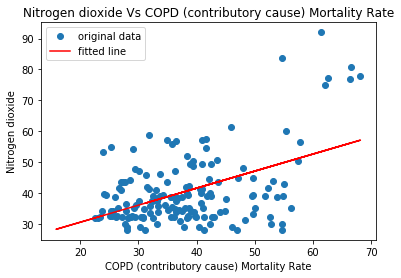

R-squared: 0.228526
slope confidence (95%): 0.552351 +/- 0.161430




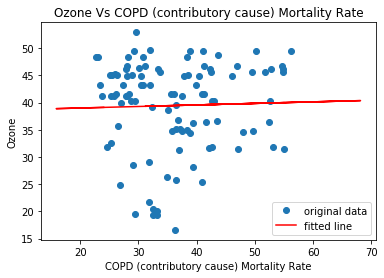

R-squared: 0.000894
slope confidence (95%): 0.028286 +/- 0.188750




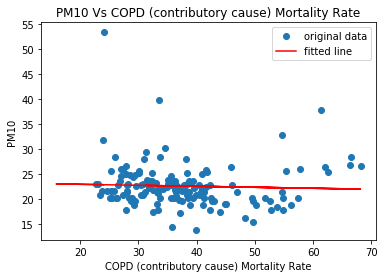

R-squared: 0.001962
slope confidence (95%): -0.019795 +/- 0.073863




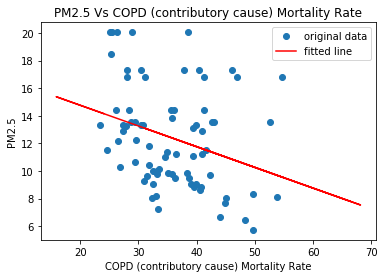

R-squared: 0.094000
slope confidence (95%): -0.150260 +/- 0.108041




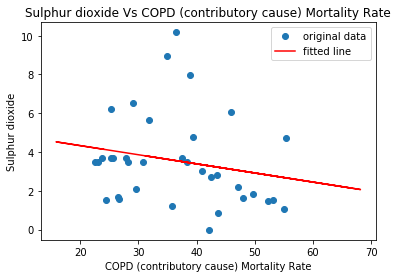

R-squared: 0.041411
slope confidence (95%): -0.047060 +/- 0.079055




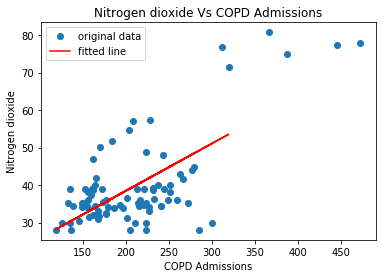

R-squared: 0.484061
slope confidence (95%): 0.126454 +/- 0.028917




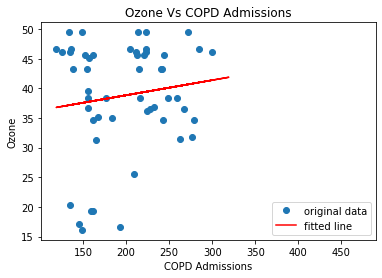

R-squared: 0.017541
slope confidence (95%): 0.025428 +/- 0.053981




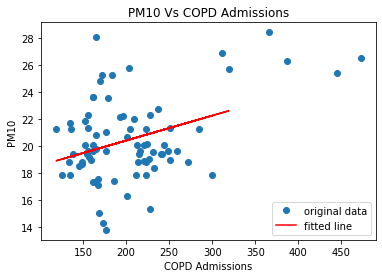

R-squared: 0.165149
slope confidence (95%): 0.018505 +/- 0.009572




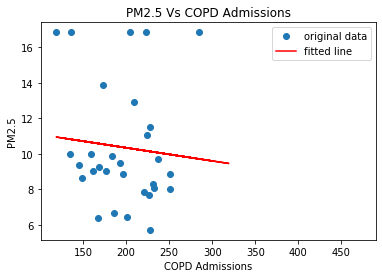

R-squared: 0.007551
slope confidence (95%): -0.007416 +/- 0.032228




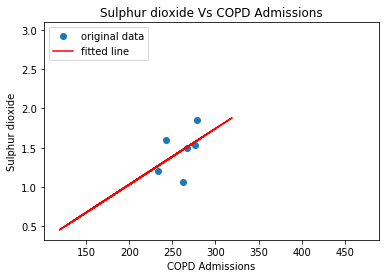

R-squared: 0.215251
slope confidence (95%): 0.007131 +/- 0.013654




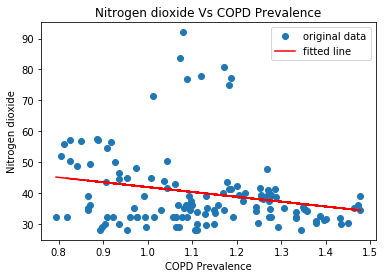

R-squared: 0.050940
slope confidence (95%): -15.728910 +/- 11.989426




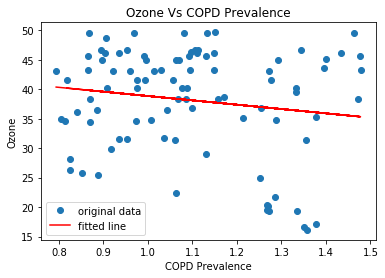

R-squared: 0.024070
slope confidence (95%): -7.357942 +/- 9.905629




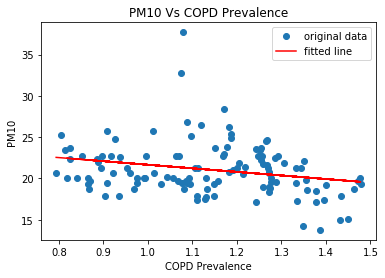

R-squared: 0.058411
slope confidence (95%): -4.327219 +/- 3.207937




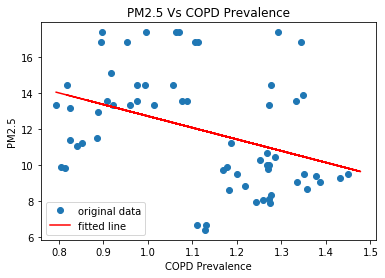

R-squared: 0.147039
slope confidence (95%): -6.432045 +/- 4.011409




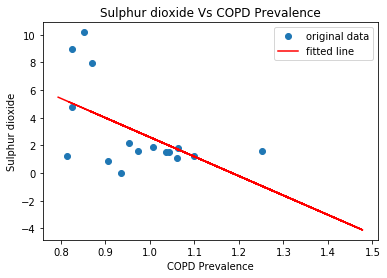

R-squared: 0.290051
slope confidence (95%): -14.033650 +/- 11.769538




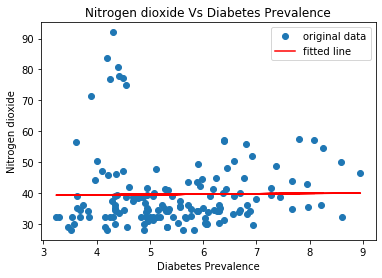

R-squared: 0.000155
slope confidence (95%): 0.116913 +/- 1.532326




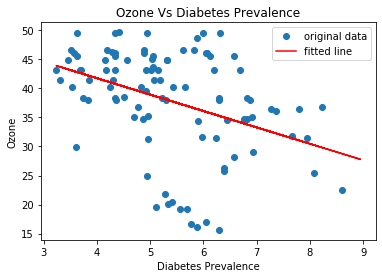

R-squared: 0.148299
slope confidence (95%): -2.823878 +/- 1.385353




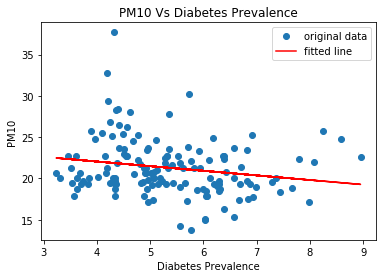

R-squared: 0.036766
slope confidence (95%): -0.559321 +/- 0.485305




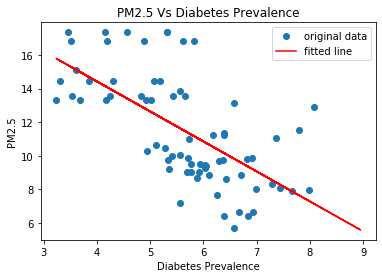

R-squared: 0.417331
slope confidence (95%): -1.785072 +/- 0.509305




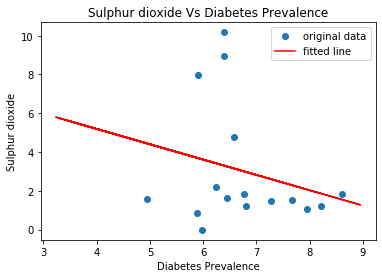

R-squared: 0.058566
slope confidence (95%): -0.791009 +/- 1.700062




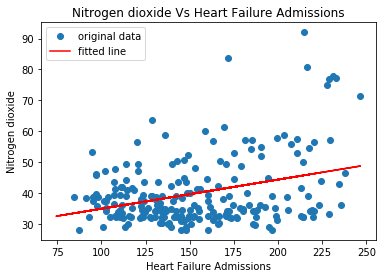

R-squared: 0.109366
slope confidence (95%): 0.094288 +/- 0.036469




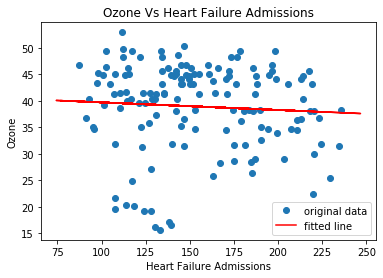

R-squared: 0.004243
slope confidence (95%): -0.014330 +/- 0.036566




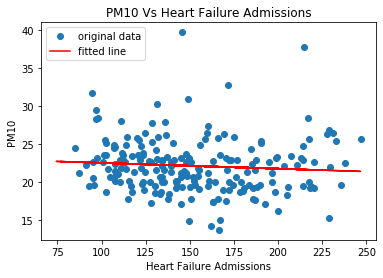

R-squared: 0.006502
slope confidence (95%): -0.007599 +/- 0.013257




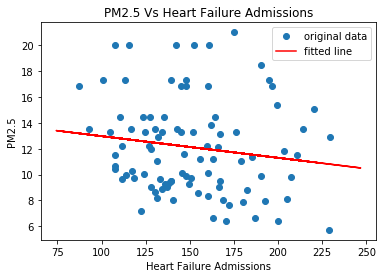

R-squared: 0.021770
slope confidence (95%): -0.016759 +/- 0.023492




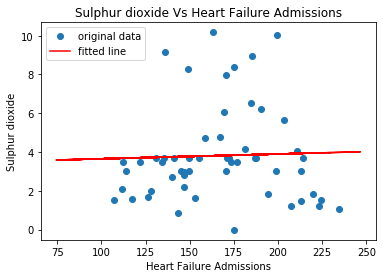

R-squared: 0.001154
slope confidence (95%): 0.002459 +/- 0.019936




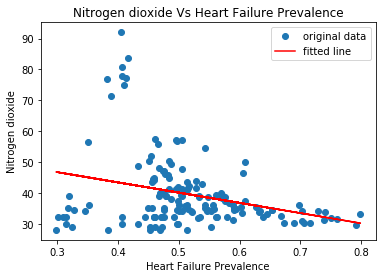

R-squared: 0.085368
slope confidence (95%): -33.136080 +/- 17.703694




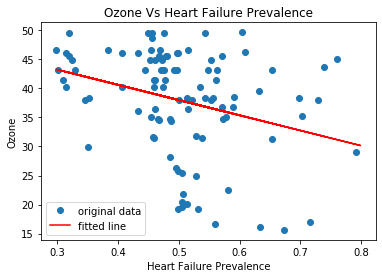

R-squared: 0.092090
slope confidence (95%): -26.200278 +/- 16.840797




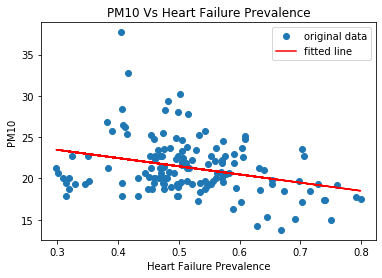

R-squared: 0.093374
slope confidence (95%): -9.939111 +/- 5.250022




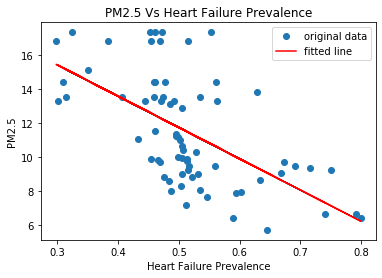

R-squared: 0.356584
slope confidence (95%): -18.407544 +/- 5.970516




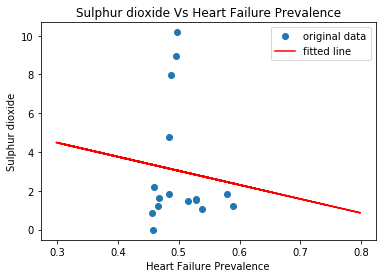

R-squared: 0.009028
slope confidence (95%): -7.253808 +/- 40.739549




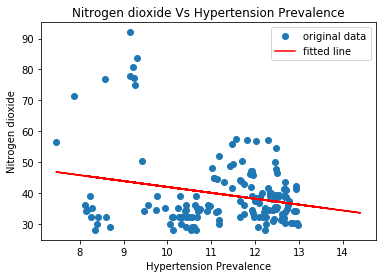

R-squared: 0.051561
slope confidence (95%): -1.904399 +/- 1.333182




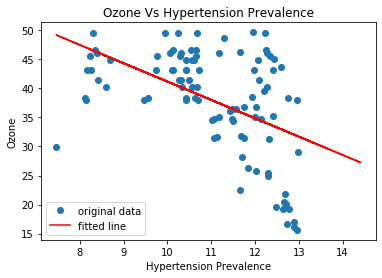

R-squared: 0.239009
slope confidence (95%): -3.158773 +/- 1.153829




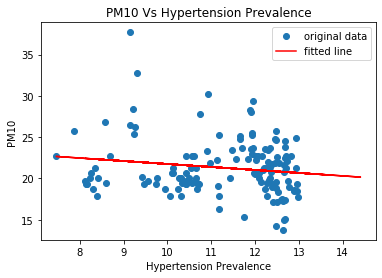

R-squared: 0.022730
slope confidence (95%): -0.360509 +/- 0.400715




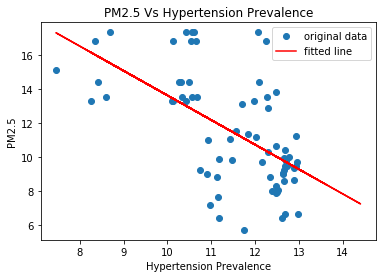

R-squared: 0.352178
slope confidence (95%): -1.447855 +/- 0.474158




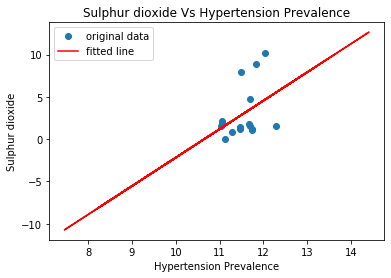

R-squared: 0.149837
slope confidence (95%): 3.364304 +/- 4.295838




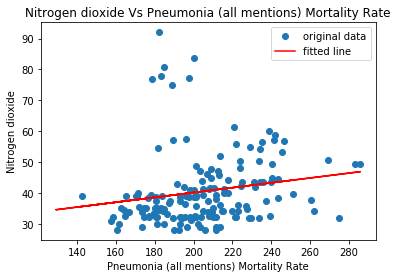

R-squared: 0.031470
slope confidence (95%): 0.078710 +/- 0.069457




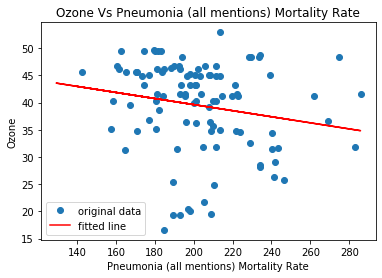

R-squared: 0.034096
slope confidence (95%): -0.055832 +/- 0.059307




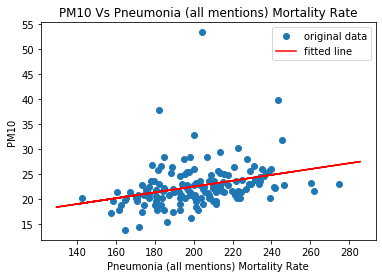

R-squared: 0.095070
slope confidence (95%): 0.058296 +/- 0.029754




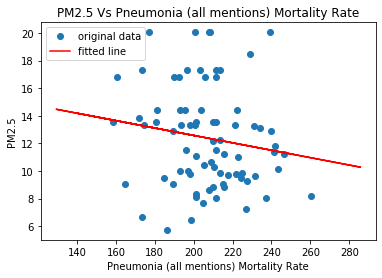

R-squared: 0.023396
slope confidence (95%): -0.026852 +/- 0.040180




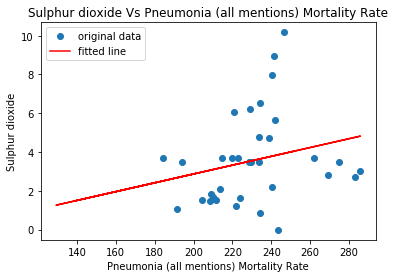

R-squared: 0.055669
slope confidence (95%): 0.022755 +/- 0.032722




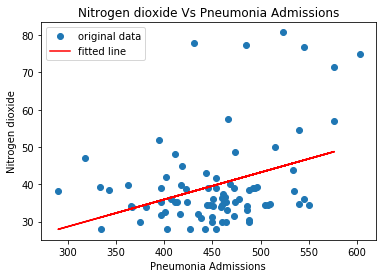

R-squared: 0.130814
slope confidence (95%): 0.072686 +/- 0.041500




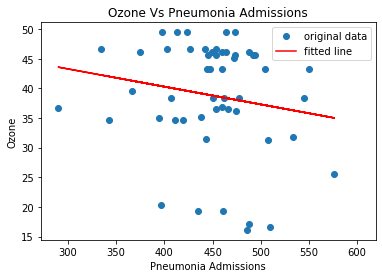

R-squared: 0.028666
slope confidence (95%): -0.029910 +/- 0.049387




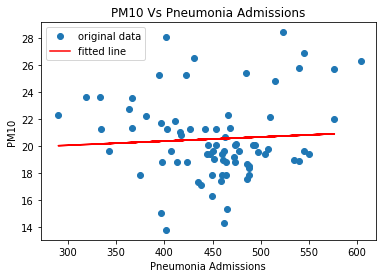

R-squared: 0.003795
slope confidence (95%): 0.003075 +/- 0.011463




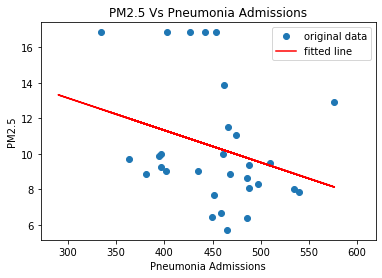

R-squared: 0.080780
slope confidence (95%): -0.018096 +/- 0.023139




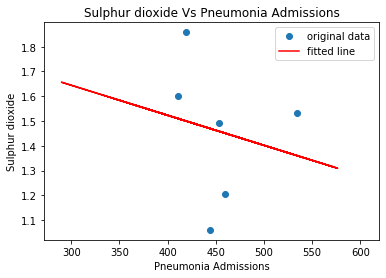

R-squared: 0.034592
slope confidence (95%): -0.001212 +/- 0.006419




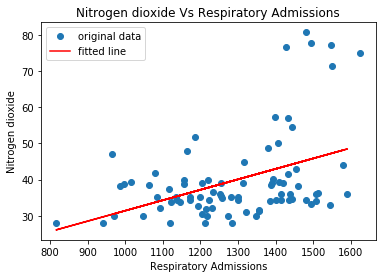

R-squared: 0.175768
slope confidence (95%): 0.028929 +/- 0.013876




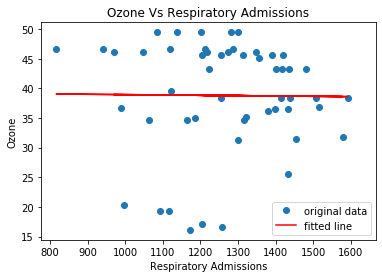

R-squared: 0.000104
slope confidence (95%): -0.000562 +/- 0.015607




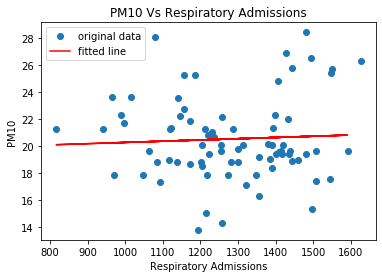

R-squared: 0.002721
slope confidence (95%): 0.000917 +/- 0.004041




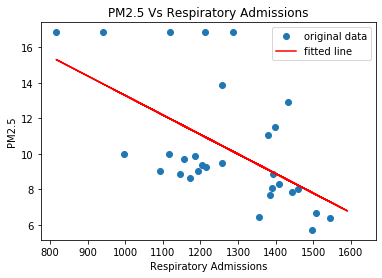

R-squared: 0.320381
slope confidence (95%): -0.010988 +/- 0.006066




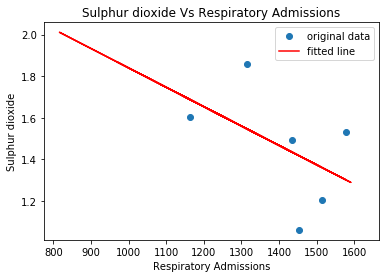

R-squared: 0.235989
slope confidence (95%): -0.000932 +/- 0.001682




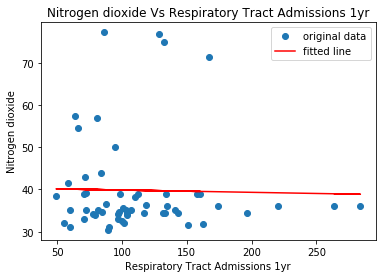

R-squared: 0.000528
slope confidence (95%): -0.005412 +/- 0.064293




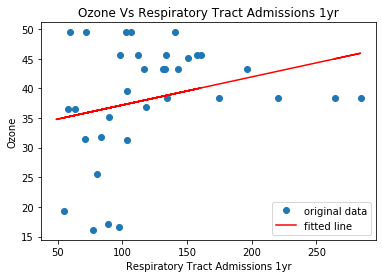

R-squared: 0.071563
slope confidence (95%): 0.047491 +/- 0.060651




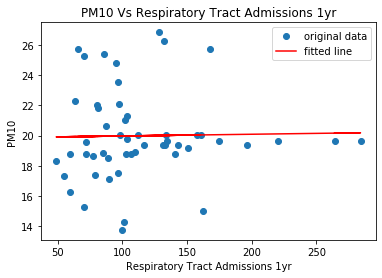

R-squared: 0.000369
slope confidence (95%): 0.001154 +/- 0.017022




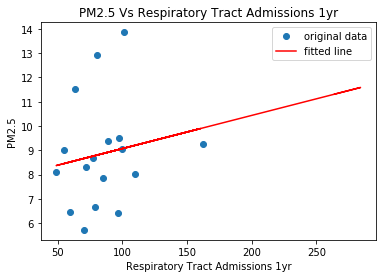

R-squared: 0.026619
slope confidence (95%): 0.013678 +/- 0.042836




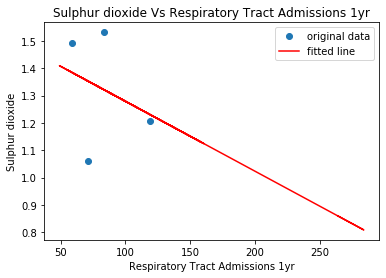

R-squared: 0.085359
slope confidence (95%): -0.002556 +/- 0.011867




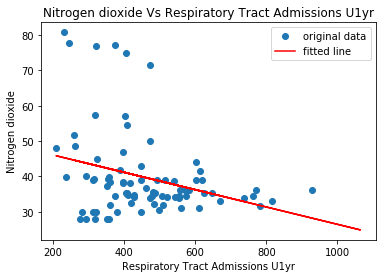

R-squared: 0.088567
slope confidence (95%): -0.024494 +/- 0.017405




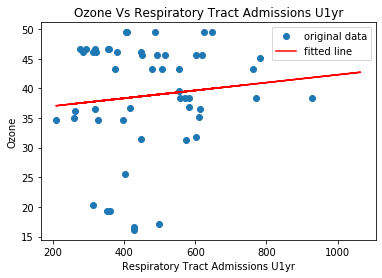

R-squared: 0.011561
slope confidence (95%): 0.006604 +/- 0.017322




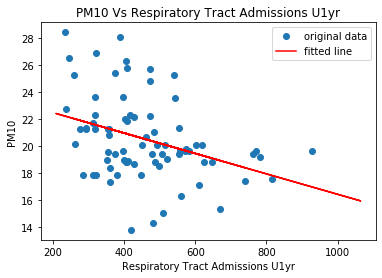

R-squared: 0.130139
slope confidence (95%): -0.007560 +/- 0.004497




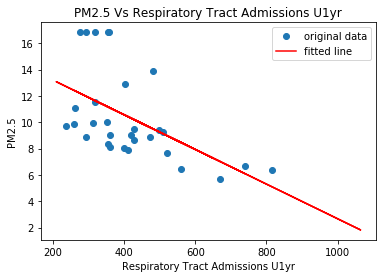

R-squared: 0.288083
slope confidence (95%): -0.013155 +/- 0.007839




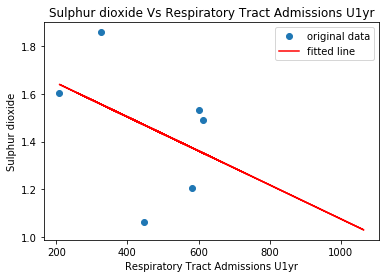

R-squared: 0.174042
slope confidence (95%): -0.000713 +/- 0.001558




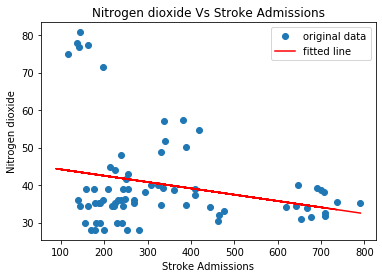

R-squared: 0.062219
slope confidence (95%): -0.016864 +/- 0.015476




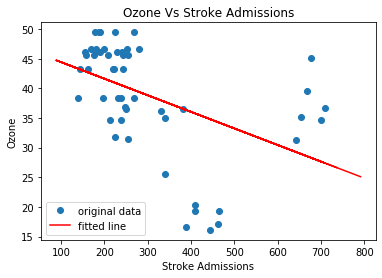

R-squared: 0.221827
slope confidence (95%): -0.027987 +/- 0.014869




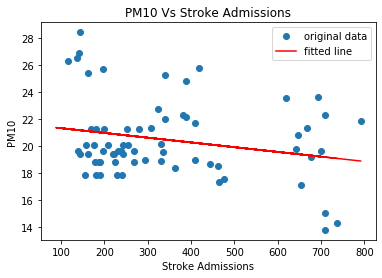

R-squared: 0.054331
slope confidence (95%): -0.003519 +/- 0.003624




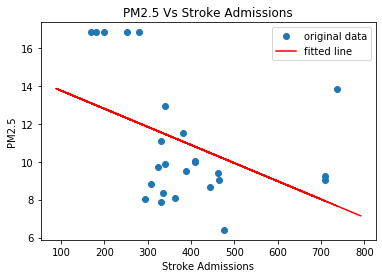

R-squared: 0.184493
slope confidence (95%): -0.009566 +/- 0.008411




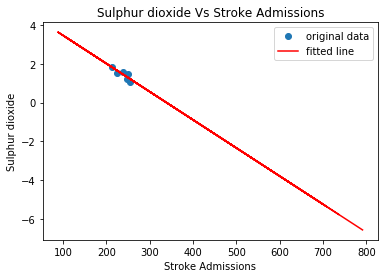

R-squared: 0.687616
slope confidence (95%): -0.014537 +/- 0.009826




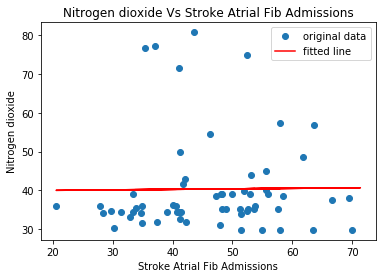

R-squared: 0.000136
slope confidence (95%): 0.012955 +/- 0.287794




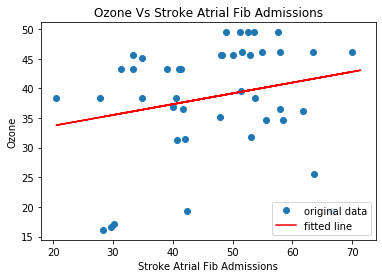

R-squared: 0.050132
slope confidence (95%): 0.182272 +/- 0.248529




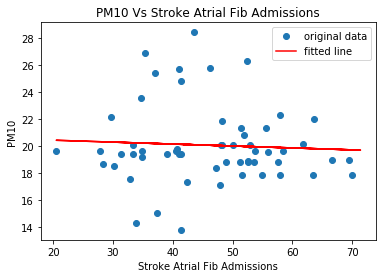

R-squared: 0.003168
slope confidence (95%): -0.014343 +/- 0.068807




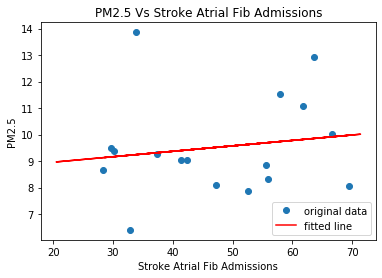

R-squared: 0.023237
slope confidence (95%): 0.020540 +/- 0.068966




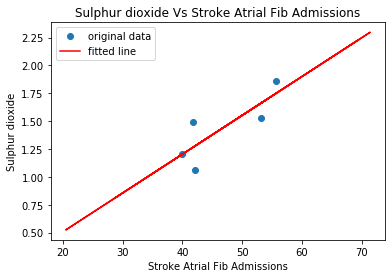

R-squared: 0.667029
slope confidence (95%): 0.034839 +/- 0.028505




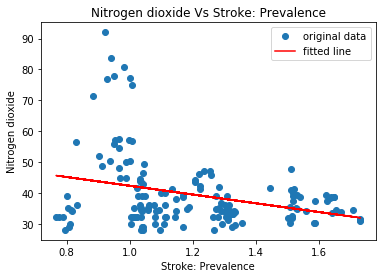

R-squared: 0.092091
slope confidence (95%): -14.176525 +/- 7.265562




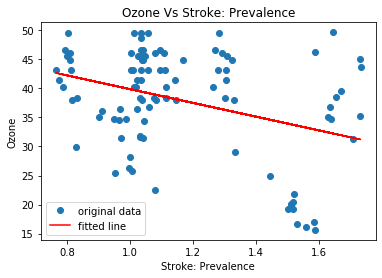

R-squared: 0.126071
slope confidence (95%): -11.856744 +/- 6.390510




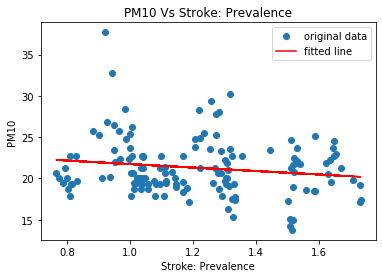

R-squared: 0.024156
slope confidence (95%): -2.106267 +/- 2.269350




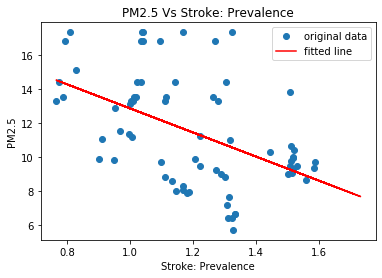

R-squared: 0.242267
slope confidence (95%): -7.097089 +/- 3.030697




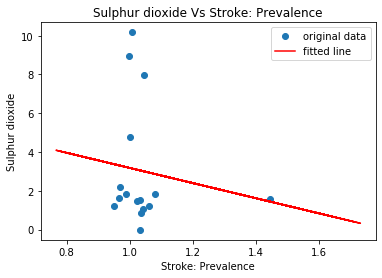

R-squared: 0.019337
slope confidence (95%): -3.902932 +/- 14.899246




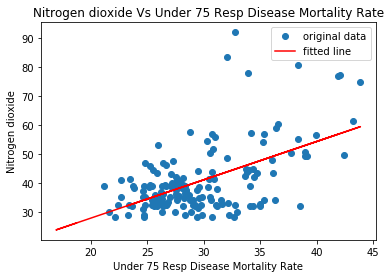

R-squared: 0.293272
slope confidence (95%): 1.324080 +/- 0.326951




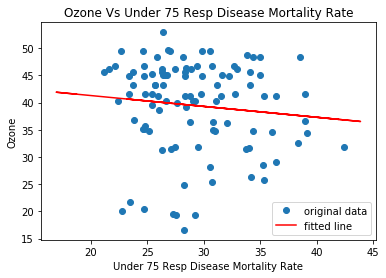

R-squared: 0.011939
slope confidence (95%): -0.199442 +/- 0.362107




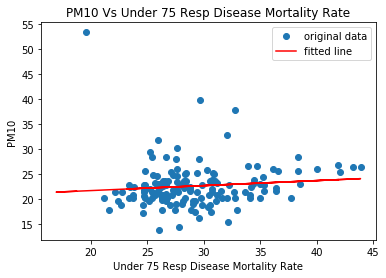

R-squared: 0.010383
slope confidence (95%): 0.099888 +/- 0.161324




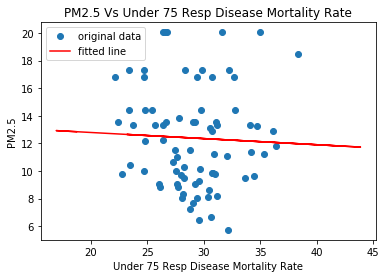

R-squared: 0.001848
slope confidence (95%): -0.044357 +/- 0.238743




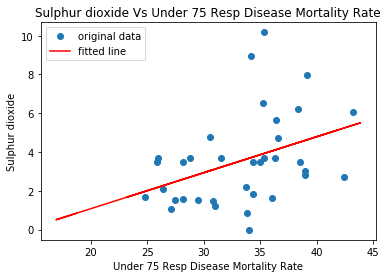

R-squared: 0.148392
slope confidence (95%): 0.185488 +/- 0.155149




In [269]:
relation = []

for h in healthVpoll_wide[health_cols]:
    for p in healthVpoll_wide[poll_cols]:

        x = healthVpoll_wide[h].to_numpy()
        y = healthVpoll_wide[p].to_numpy()

        mask = ~np.isnan(x) & ~np.isnan(y)

        res = stats.linregress(x[mask], y[mask])
        
        relation.append((h,p,res.rvalue**2))
        
        plt.plot(x, y, 'o', label='original data')
        plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
        plt.title("{} Vs {}".format(p , h))
        plt.xlabel(h)
        plt.ylabel(p)
        plt.legend()
        plt.show()
        
        
        print(f"R-squared: {res.rvalue**2:.6f}")
        print(f"slope confidence (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
        print('\n')

In [270]:
print(sorted(relation,key=lambda x: x[2], reverse=True)[0])
print(sorted(relation,key=lambda x: x[2], reverse=False)[0])

('Stroke Admissions', 'Sulphur dioxide', 0.6876160396240066)
('CKD Prevalence', 'PM10', 9.269230436992791e-06)


## Testing Ozone 

In [271]:
Ozone_R = []

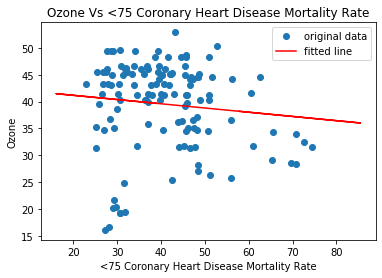

R-squared: 0.011706
slope confidence (95%): -0.078603 +/- 0.128547




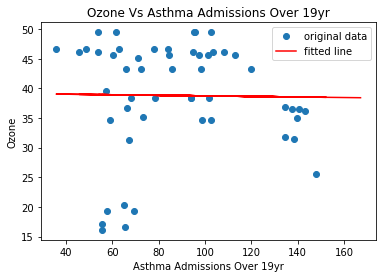

R-squared: 0.000213
slope confidence (95%): -0.004663 +/- 0.090606




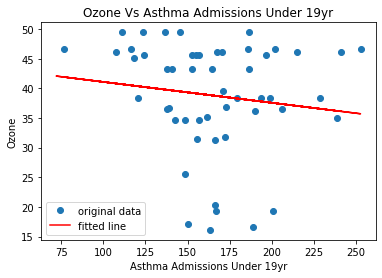

R-squared: 0.017872
slope confidence (95%): -0.035184 +/- 0.073983




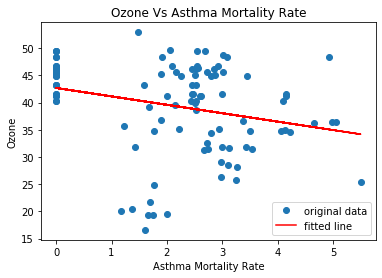

R-squared: 0.071084
slope confidence (95%): -1.545408 +/- 1.114965




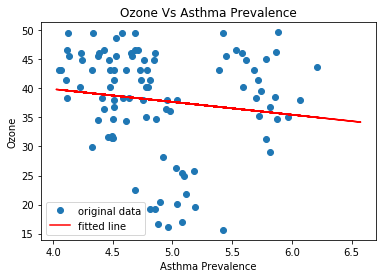

R-squared: 0.018177
slope confidence (95%): -2.210867 +/- 3.326258




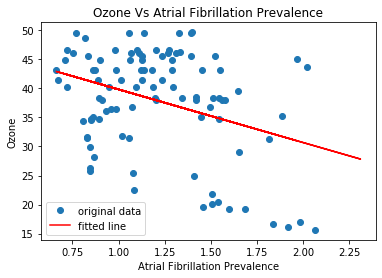

R-squared: 0.121859
slope confidence (95%): -9.151993 +/- 5.029318




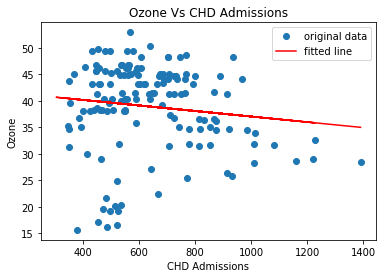

R-squared: 0.015154
slope confidence (95%): -0.005211 +/- 0.006997




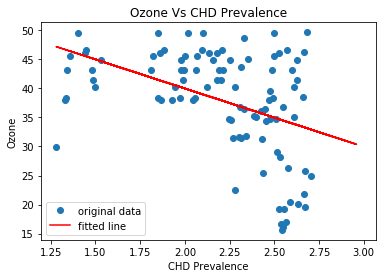

R-squared: 0.183402
slope confidence (95%): -10.025526 +/- 4.330617




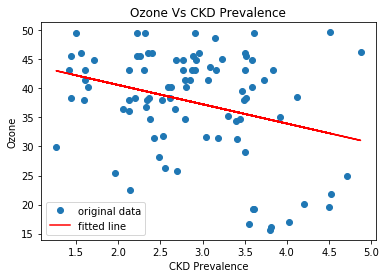

R-squared: 0.093781
slope confidence (95%): -3.320001 +/- 2.219286




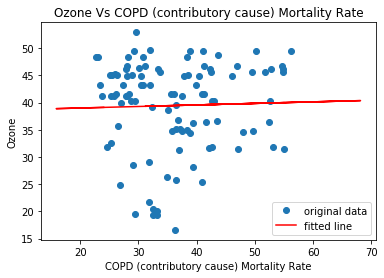

R-squared: 0.000894
slope confidence (95%): 0.028286 +/- 0.188750




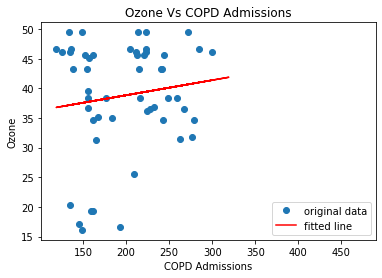

R-squared: 0.017541
slope confidence (95%): 0.025428 +/- 0.053981




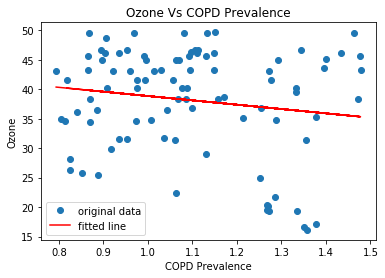

R-squared: 0.024070
slope confidence (95%): -7.357942 +/- 9.905629




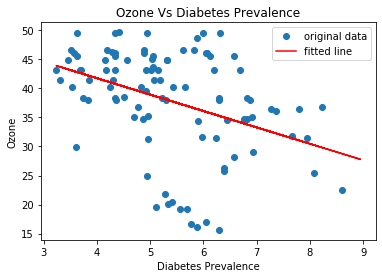

R-squared: 0.148299
slope confidence (95%): -2.823878 +/- 1.385353




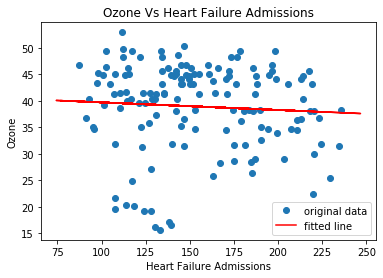

R-squared: 0.004243
slope confidence (95%): -0.014330 +/- 0.036566




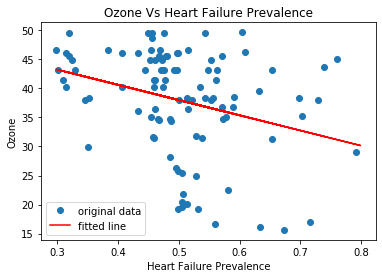

R-squared: 0.092090
slope confidence (95%): -26.200278 +/- 16.840797




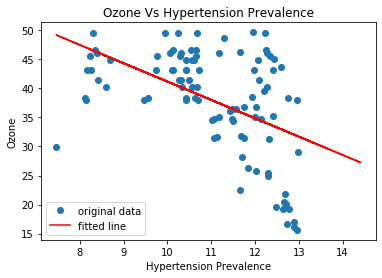

R-squared: 0.239009
slope confidence (95%): -3.158773 +/- 1.153829




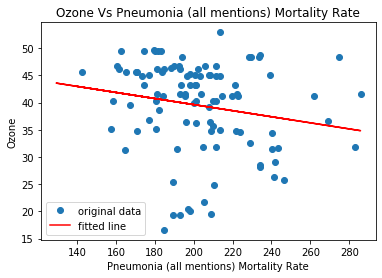

R-squared: 0.034096
slope confidence (95%): -0.055832 +/- 0.059307




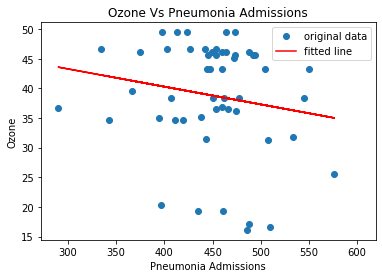

R-squared: 0.028666
slope confidence (95%): -0.029910 +/- 0.049387




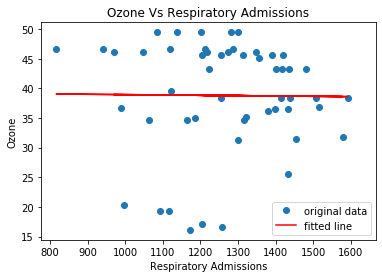

R-squared: 0.000104
slope confidence (95%): -0.000562 +/- 0.015607




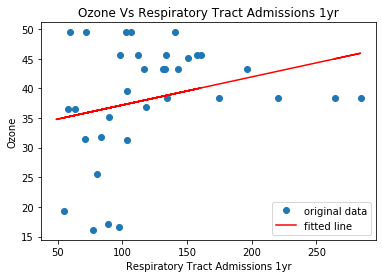

R-squared: 0.071563
slope confidence (95%): 0.047491 +/- 0.060651




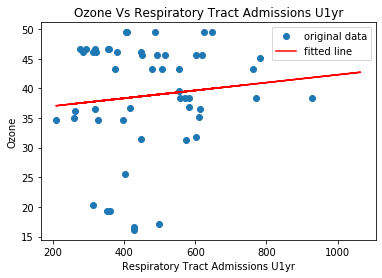

R-squared: 0.011561
slope confidence (95%): 0.006604 +/- 0.017322




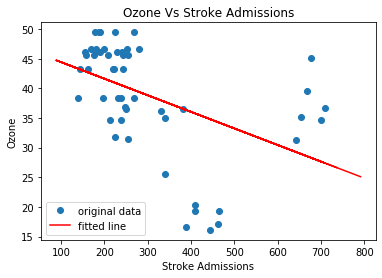

R-squared: 0.221827
slope confidence (95%): -0.027987 +/- 0.014869




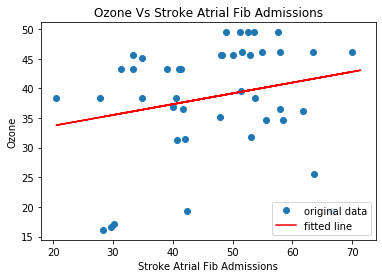

R-squared: 0.050132
slope confidence (95%): 0.182272 +/- 0.248529




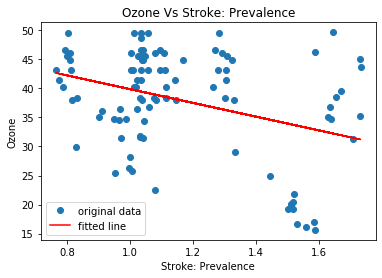

R-squared: 0.126071
slope confidence (95%): -11.856744 +/- 6.390510




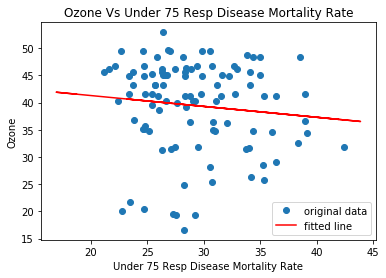

R-squared: 0.011939
slope confidence (95%): -0.199442 +/- 0.362107




In [272]:
for h in healthVpoll_wide[health_cols]:
    x = healthVpoll_wide[h].to_numpy()
    y = healthVpoll_wide['Ozone'].to_numpy()

    mask = ~np.isnan(x) & ~np.isnan(y)

    res = stats.linregress(x[mask], y[mask])

    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
    plt.title("Ozone Vs {}".format( h))
    plt.xlabel(h)
    plt.ylabel("Ozone")
    plt.legend()
    plt.show()
    Ozone_R.append((h,res.rvalue**2))
    

    print(f"R-squared: {res.rvalue**2:.6f}")
    print(f"slope confidence (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
    print('\n')

In [273]:
print(sorted(Ozone_R,key=lambda x: x[1], reverse=True)[0])
print(sorted(Ozone_R,key=lambda x: x[1], reverse=False)[0])

('Hypertension Prevalence', 0.2390089868144973)
('Respiratory Admissions', 0.00010446943866111047)


## Testing PM10

In [274]:
PM10_R = []

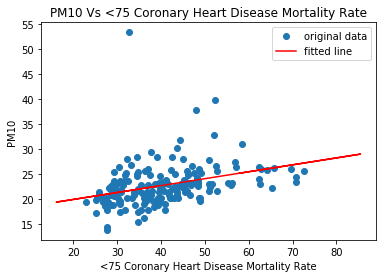

R-squared: 0.117331
slope confidence (95%): 0.138389 +/- 0.057225




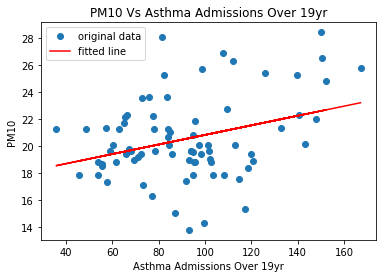

R-squared: 0.109009
slope confidence (95%): 0.035487 +/- 0.023342




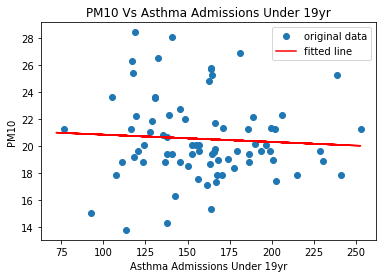

R-squared: 0.004001
slope confidence (95%): -0.005378 +/- 0.019522




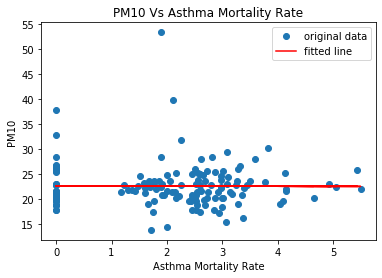

R-squared: 0.000048
slope confidence (95%): -0.022550 +/- 0.538733




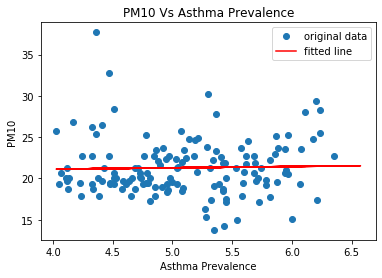

R-squared: 0.000742
slope confidence (95%): 0.158067 +/- 0.983120




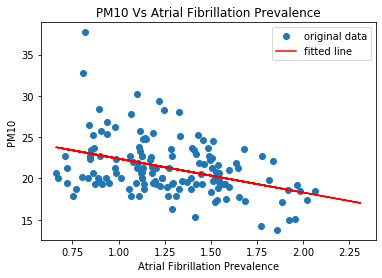

R-squared: 0.150217
slope confidence (95%): -4.093924 +/- 1.650619




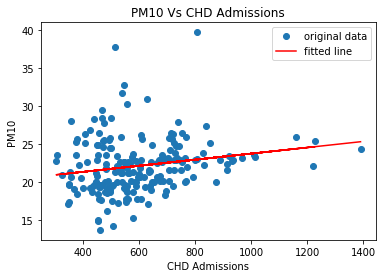

R-squared: 0.037010
slope confidence (95%): 0.003979 +/- 0.002864




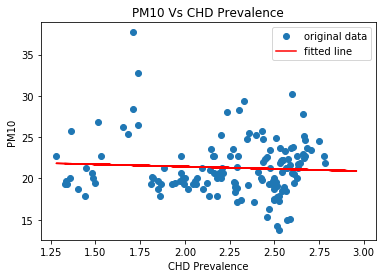

R-squared: 0.003734
slope confidence (95%): -0.549214 +/- 1.520761




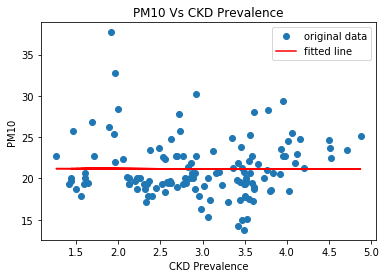

R-squared: 0.000009
slope confidence (95%): -0.013243 +/- 0.774151




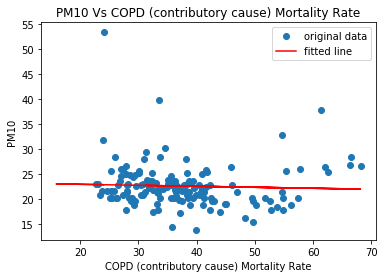

R-squared: 0.001962
slope confidence (95%): -0.019795 +/- 0.073863




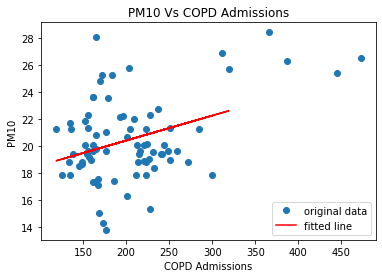

R-squared: 0.165149
slope confidence (95%): 0.018505 +/- 0.009572




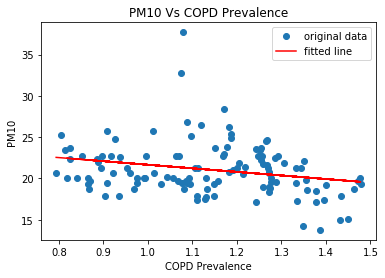

R-squared: 0.058411
slope confidence (95%): -4.327219 +/- 3.207937




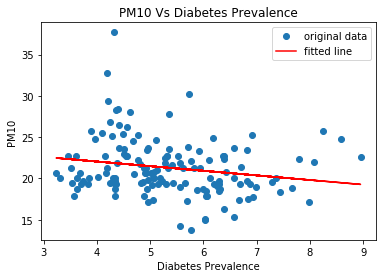

R-squared: 0.036766
slope confidence (95%): -0.559321 +/- 0.485305




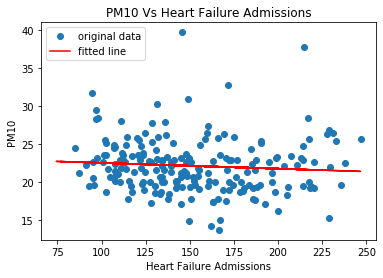

R-squared: 0.006502
slope confidence (95%): -0.007599 +/- 0.013257




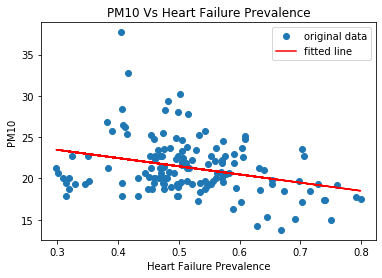

R-squared: 0.093374
slope confidence (95%): -9.939111 +/- 5.250022




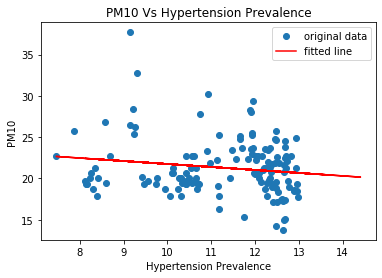

R-squared: 0.022730
slope confidence (95%): -0.360509 +/- 0.400715




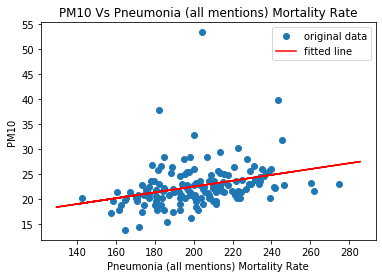

R-squared: 0.095070
slope confidence (95%): 0.058296 +/- 0.029754




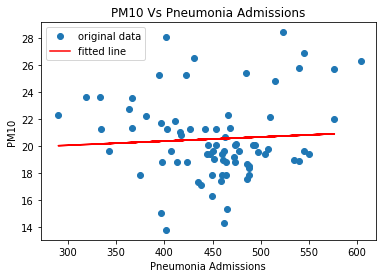

R-squared: 0.003795
slope confidence (95%): 0.003075 +/- 0.011463




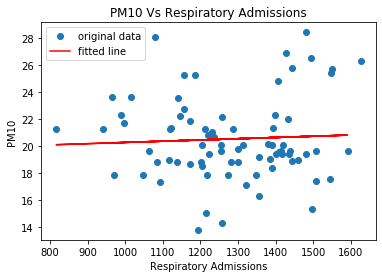

R-squared: 0.002721
slope confidence (95%): 0.000917 +/- 0.004041




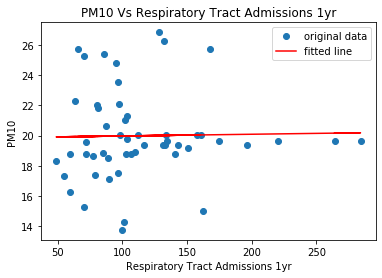

R-squared: 0.000369
slope confidence (95%): 0.001154 +/- 0.017022




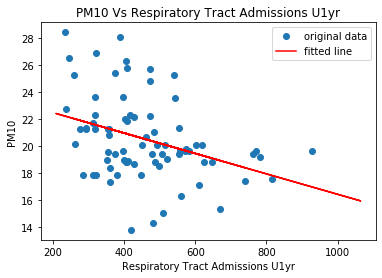

R-squared: 0.130139
slope confidence (95%): -0.007560 +/- 0.004497




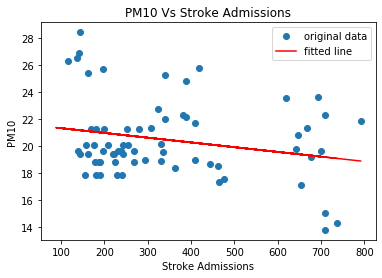

R-squared: 0.054331
slope confidence (95%): -0.003519 +/- 0.003624




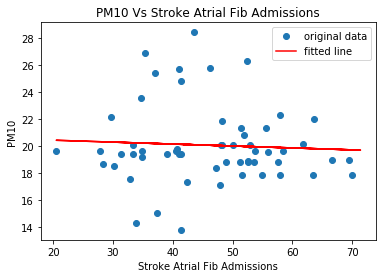

R-squared: 0.003168
slope confidence (95%): -0.014343 +/- 0.068807




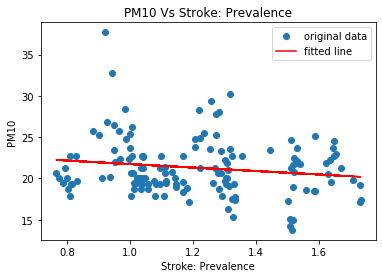

R-squared: 0.024156
slope confidence (95%): -2.106267 +/- 2.269350




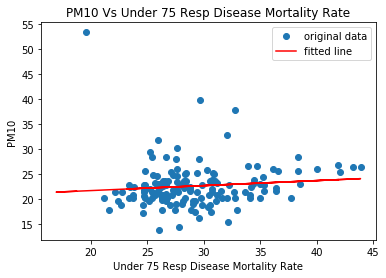

R-squared: 0.010383
slope confidence (95%): 0.099888 +/- 0.161324




In [275]:
for h in healthVpoll_wide[health_cols]:
    x = healthVpoll_wide[h].to_numpy()
    y = healthVpoll_wide['PM10'].to_numpy()

    mask = ~np.isnan(x) & ~np.isnan(y)

    res = stats.linregress(x[mask], y[mask])

    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
    plt.title("PM10 Vs {}".format( h))
    plt.xlabel(h)
    plt.ylabel("PM10")
    plt.legend()
    plt.show()
    PM10_R.append((h,res.rvalue**2))
    

    print(f"R-squared: {res.rvalue**2:.6f}")
    print(f"slope confidence (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
    print('\n')

In [276]:
print(sorted(PM10_R,key=lambda x: x[1], reverse=True)[0])
print(sorted(PM10_R,key=lambda x: x[1], reverse=False)[0])

('COPD Admissions', 0.16514931953350967)
('CKD Prevalence', 9.269230436992791e-06)


## Testing Nitrogen dioxide

In [277]:
NO2_R = []

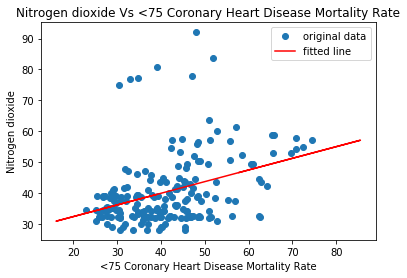

R-squared: 0.132972
slope confidence (95%): 0.377713 +/- 0.139978




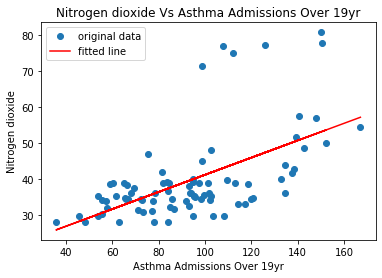

R-squared: 0.328788
slope confidence (95%): 0.237753 +/- 0.075243




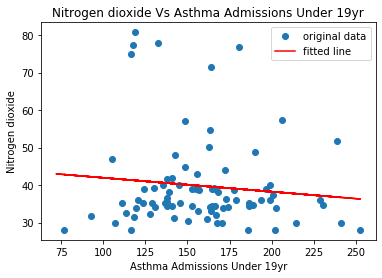

R-squared: 0.011505
slope confidence (95%): -0.037099 +/- 0.076167




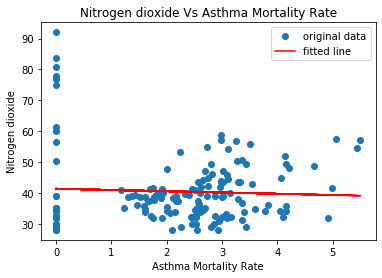

R-squared: 0.002420
slope confidence (95%): -0.408717 +/- 1.319960




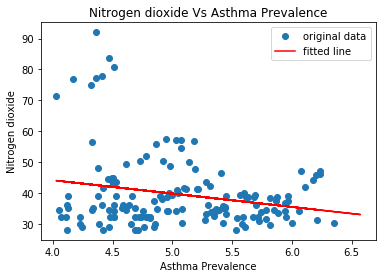

R-squared: 0.048133
slope confidence (95%): -4.318692 +/- 3.134760




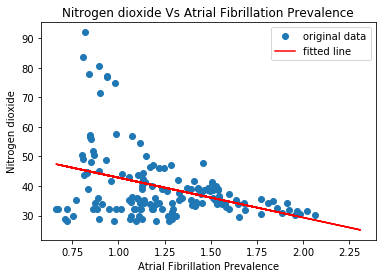

R-squared: 0.143482
slope confidence (95%): -13.494160 +/- 5.381499




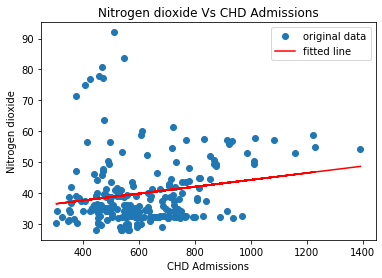

R-squared: 0.033052
slope confidence (95%): 0.011120 +/- 0.008152




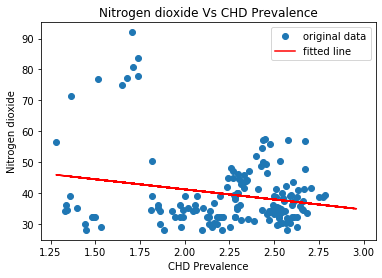

R-squared: 0.043086
slope confidence (95%): -6.542212 +/- 5.032467




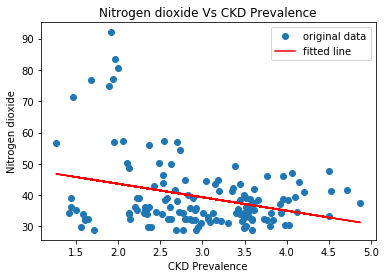

R-squared: 0.088570
slope confidence (95%): -4.302273 +/- 2.365001




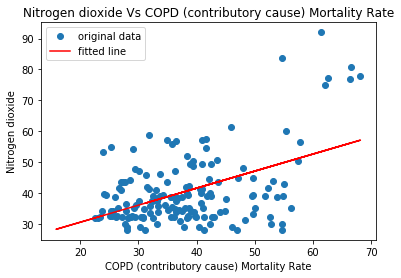

R-squared: 0.228526
slope confidence (95%): 0.552351 +/- 0.161430




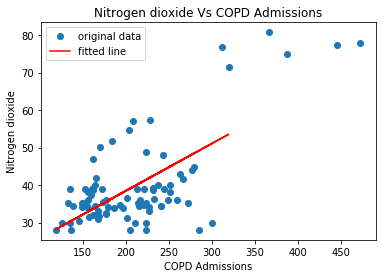

R-squared: 0.484061
slope confidence (95%): 0.126454 +/- 0.028917




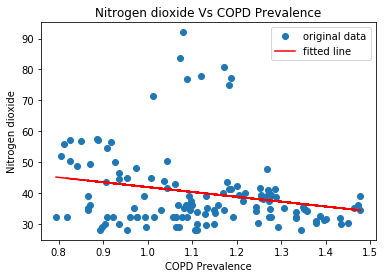

R-squared: 0.050940
slope confidence (95%): -15.728910 +/- 11.989426




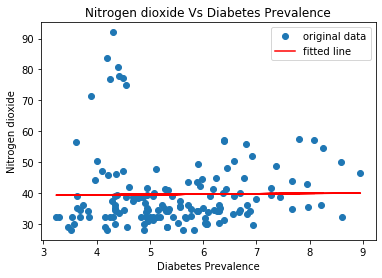

R-squared: 0.000155
slope confidence (95%): 0.116913 +/- 1.532326




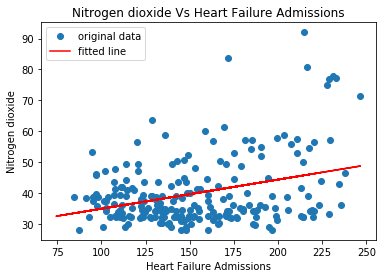

R-squared: 0.109366
slope confidence (95%): 0.094288 +/- 0.036469




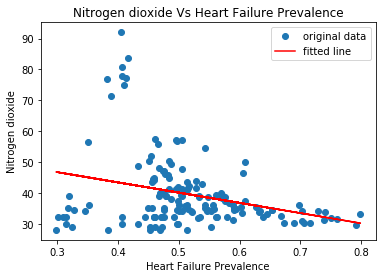

R-squared: 0.085368
slope confidence (95%): -33.136080 +/- 17.703694




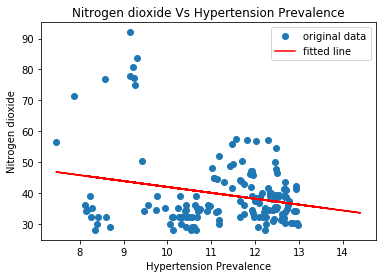

R-squared: 0.051561
slope confidence (95%): -1.904399 +/- 1.333182




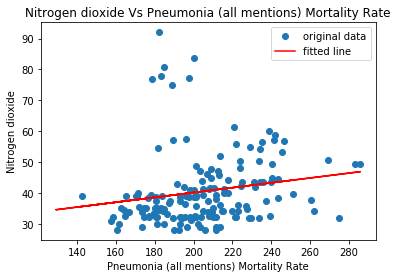

R-squared: 0.031470
slope confidence (95%): 0.078710 +/- 0.069457




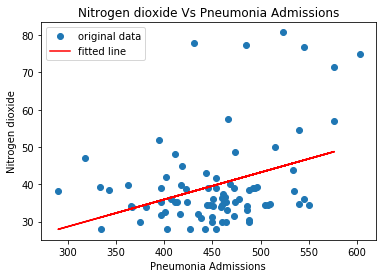

R-squared: 0.130814
slope confidence (95%): 0.072686 +/- 0.041500




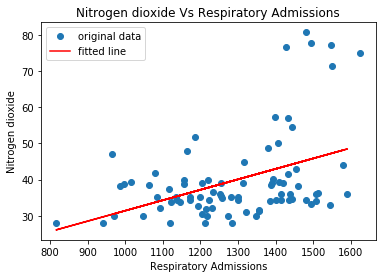

R-squared: 0.175768
slope confidence (95%): 0.028929 +/- 0.013876




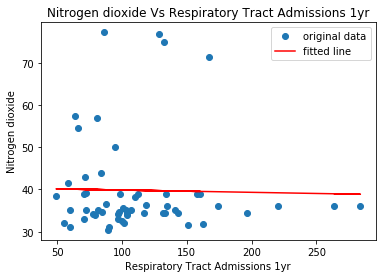

R-squared: 0.000528
slope confidence (95%): -0.005412 +/- 0.064293




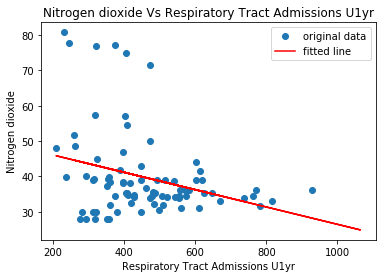

R-squared: 0.088567
slope confidence (95%): -0.024494 +/- 0.017405




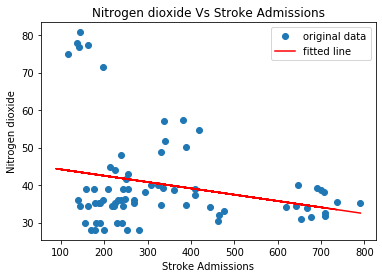

R-squared: 0.062219
slope confidence (95%): -0.016864 +/- 0.015476




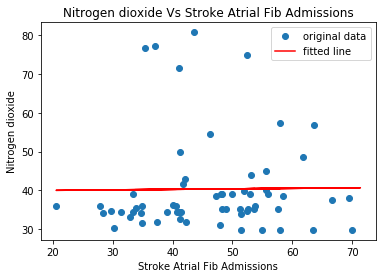

R-squared: 0.000136
slope confidence (95%): 0.012955 +/- 0.287794




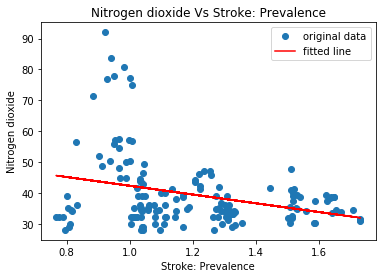

R-squared: 0.092091
slope confidence (95%): -14.176525 +/- 7.265562




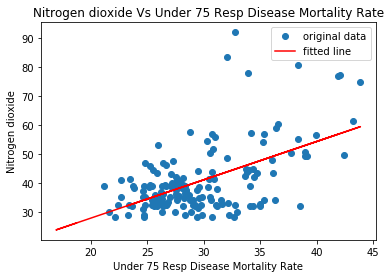

R-squared: 0.293272
slope confidence (95%): 1.324080 +/- 0.326951




In [278]:
for h in healthVpoll_wide[health_cols]:
    x = healthVpoll_wide[h].to_numpy()
    y = healthVpoll_wide['Nitrogen dioxide'].to_numpy()

    mask = ~np.isnan(x) & ~np.isnan(y)

    res = stats.linregress(x[mask], y[mask])

    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
    plt.title("Nitrogen dioxide Vs {}".format( h))
    plt.xlabel(h)
    plt.ylabel("Nitrogen dioxide")
    plt.legend()
    plt.show()
    NO2_R.append((h,res.rvalue**2))
    

    print(f"R-squared: {res.rvalue**2:.6f}")
    print(f"slope confidence (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
    print('\n')

In [279]:
print(sorted(NO2_R,key=lambda x: x[1], reverse=True)[0])
print(sorted(NO2_R,key=lambda x: x[1], reverse=False)[0])

('COPD Admissions', 0.48406078773524197)
('Stroke Atrial Fib Admissions', 0.00013585304100702743)


## Testing Sulphur Dioxide

In [280]:
SO2_R = []

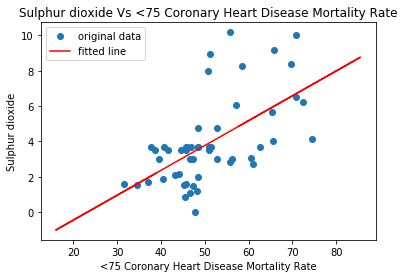

R-squared: 0.349524
slope confidence (95%): 0.140853 +/- 0.053968




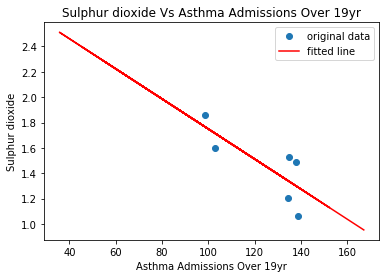

R-squared: 0.590390
slope confidence (95%): -0.011862 +/- 0.009909




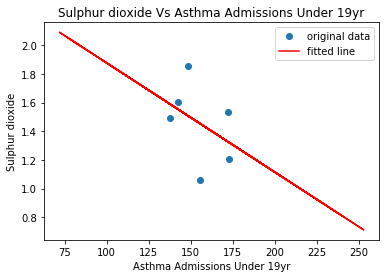

R-squared: 0.159347
slope confidence (95%): -0.007629 +/- 0.017573




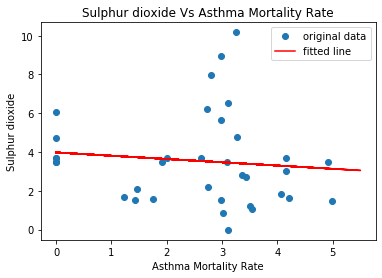

R-squared: 0.011095
slope confidence (95%): -0.168745 +/- 0.556250




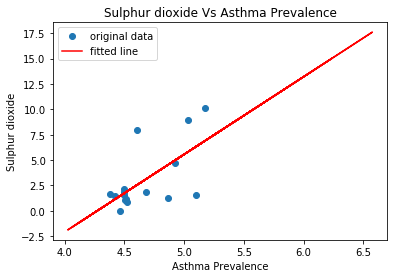

R-squared: 0.400263
slope confidence (95%): 7.652735 +/- 5.021533




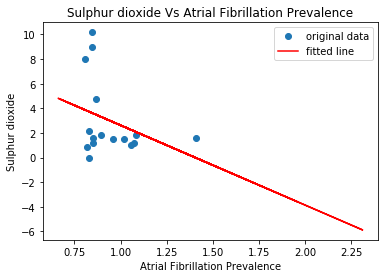

R-squared: 0.104847
slope confidence (95%): -6.479755 +/- 10.149431




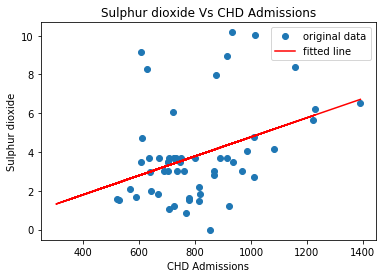

R-squared: 0.142363
slope confidence (95%): 0.004963 +/- 0.003356




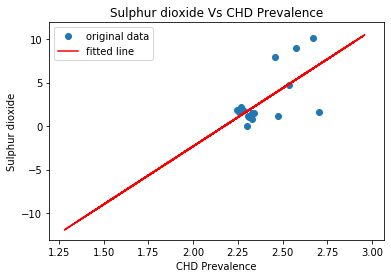

R-squared: 0.401938
slope confidence (95%): 13.354741 +/- 8.732548




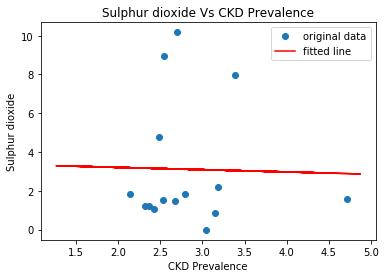

R-squared: 0.000514
slope confidence (95%): -0.116983 +/- 2.868989




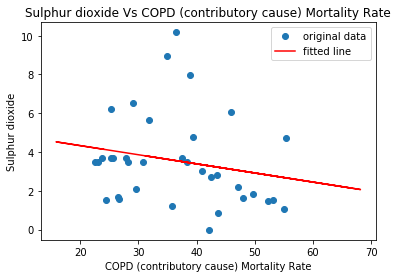

R-squared: 0.041411
slope confidence (95%): -0.047060 +/- 0.079055




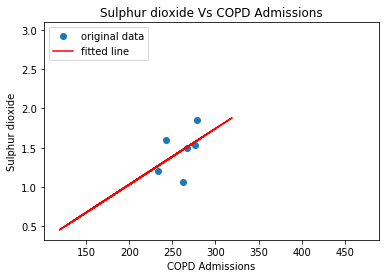

R-squared: 0.215251
slope confidence (95%): 0.007131 +/- 0.013654




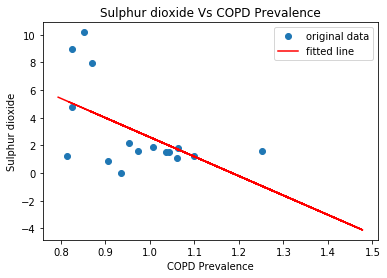

R-squared: 0.290051
slope confidence (95%): -14.033650 +/- 11.769538




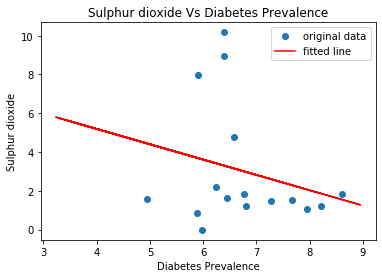

R-squared: 0.058566
slope confidence (95%): -0.791009 +/- 1.700062




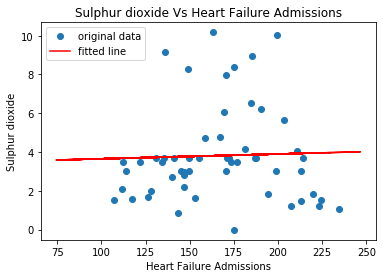

R-squared: 0.001154
slope confidence (95%): 0.002459 +/- 0.019936




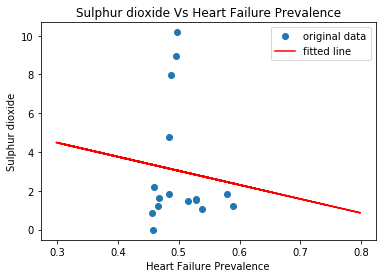

R-squared: 0.009028
slope confidence (95%): -7.253808 +/- 40.739549




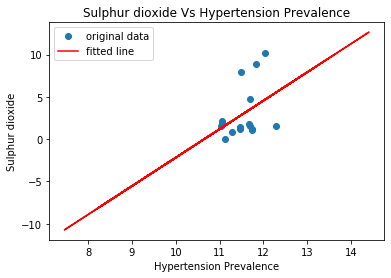

R-squared: 0.149837
slope confidence (95%): 3.364304 +/- 4.295838




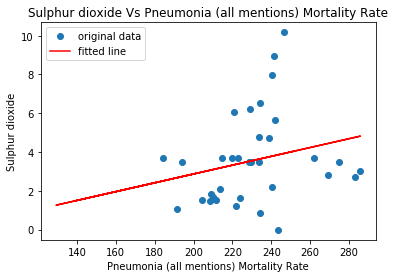

R-squared: 0.055669
slope confidence (95%): 0.022755 +/- 0.032722




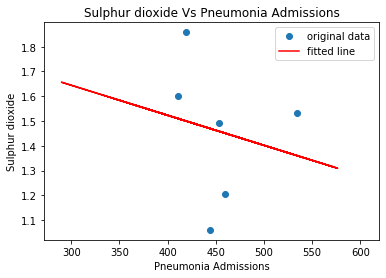

R-squared: 0.034592
slope confidence (95%): -0.001212 +/- 0.006419




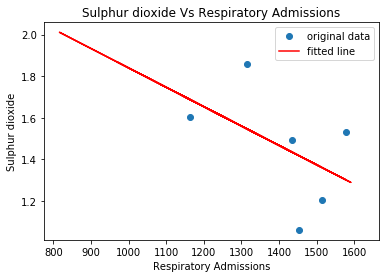

R-squared: 0.235989
slope confidence (95%): -0.000932 +/- 0.001682




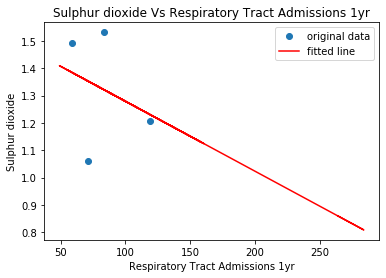

R-squared: 0.085359
slope confidence (95%): -0.002556 +/- 0.011867




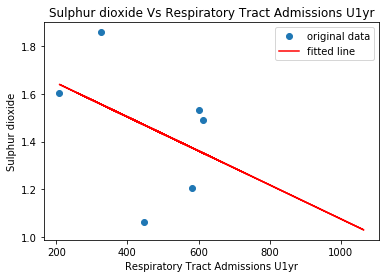

R-squared: 0.174042
slope confidence (95%): -0.000713 +/- 0.001558




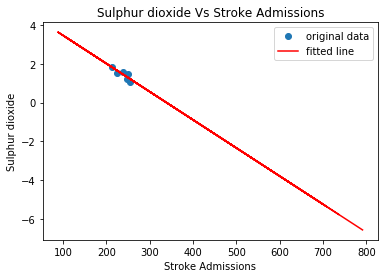

R-squared: 0.687616
slope confidence (95%): -0.014537 +/- 0.009826




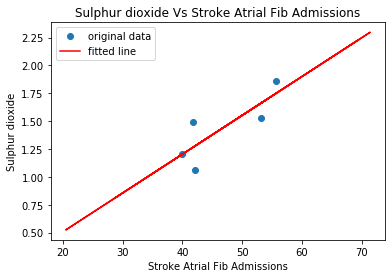

R-squared: 0.667029
slope confidence (95%): 0.034839 +/- 0.028505




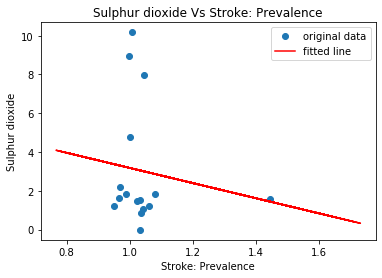

R-squared: 0.019337
slope confidence (95%): -3.902932 +/- 14.899246




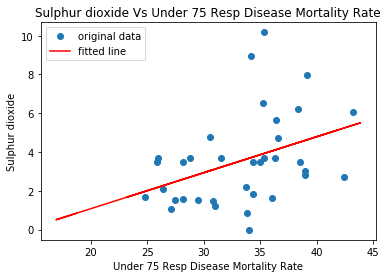

R-squared: 0.148392
slope confidence (95%): 0.185488 +/- 0.155149




In [281]:
for h in healthVpoll_wide[health_cols]:
    x = healthVpoll_wide[h].to_numpy()
    y = healthVpoll_wide['Sulphur dioxide'].to_numpy()

    mask = ~np.isnan(x) & ~np.isnan(y)

    res = stats.linregress(x[mask], y[mask])

    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
    plt.title("Sulphur dioxide Vs {}".format( h))
    plt.xlabel(h)
    plt.ylabel("Sulphur dioxide")
    plt.legend()
    plt.show()
    SO2_R.append((h,res.rvalue**2))
    

    print(f"R-squared: {res.rvalue**2:.6f}")
    print(f"slope confidence (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
    print('\n')

In [282]:
print(sorted(SO2_R,key=lambda x: x[1], reverse=True)[0])
print(sorted(SO2_R,key=lambda x: x[1], reverse=False)[0])

('Stroke Admissions', 0.6876160396240066)
('CKD Prevalence', 0.0005142467197036604)


## Testing PM2.5

In [285]:
PM25_R = []

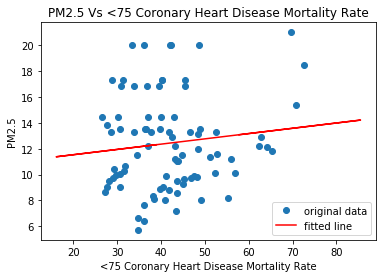

R-squared: 0.013962
slope confidence (95%): 0.040882 +/- 0.075640




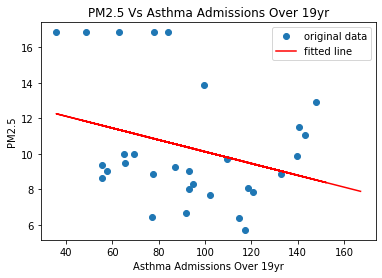

R-squared: 0.089506
slope confidence (95%): -0.033194 +/- 0.040130




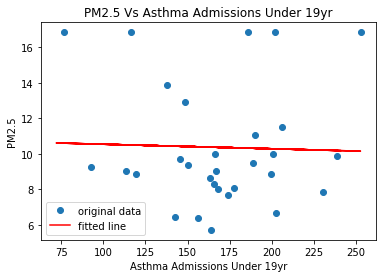

R-squared: 0.000921
slope confidence (95%): -0.002541 +/- 0.031714




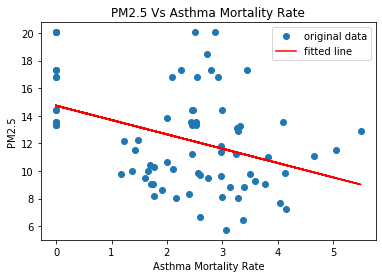

R-squared: 0.148135
slope confidence (95%): -1.039482 +/- 0.577322




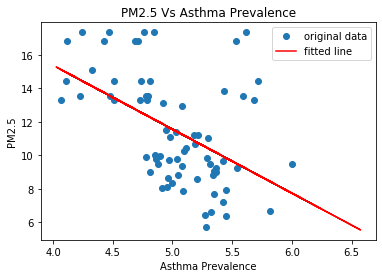

R-squared: 0.243058
slope confidence (95%): -3.818592 +/- 1.627163




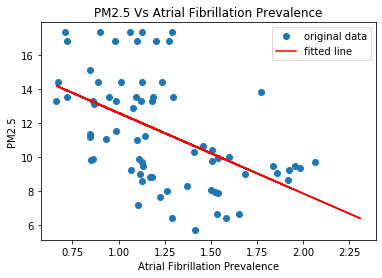

R-squared: 0.256015
slope confidence (95%): -4.735266 +/- 1.949151




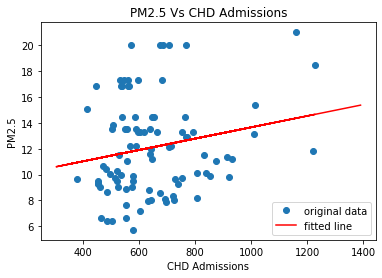

R-squared: 0.039643
slope confidence (95%): 0.004379 +/- 0.004507




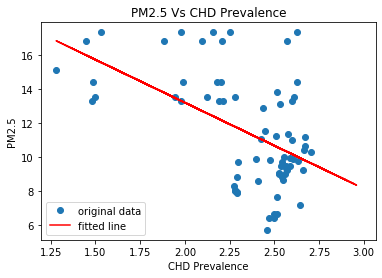

R-squared: 0.273864
slope confidence (95%): -5.059145 +/- 1.989159




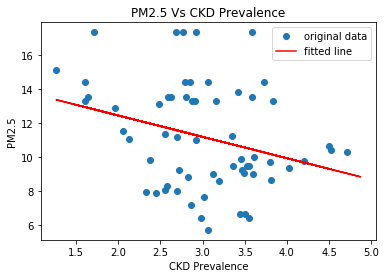

R-squared: 0.088389
slope confidence (95%): -1.255372 +/- 1.043949




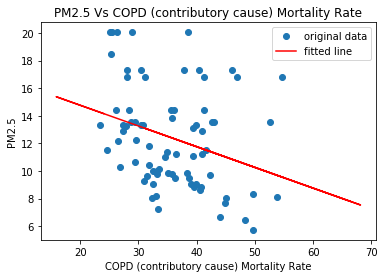

R-squared: 0.094000
slope confidence (95%): -0.150260 +/- 0.108041




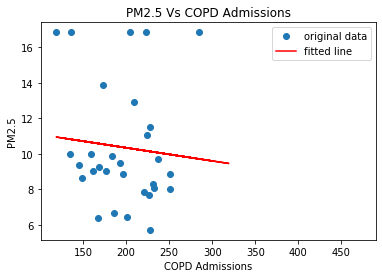

R-squared: 0.007551
slope confidence (95%): -0.007416 +/- 0.032228




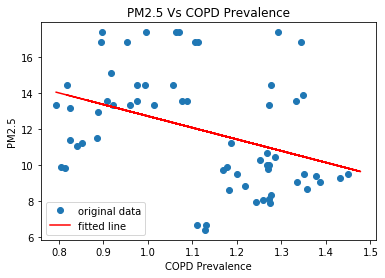

R-squared: 0.147039
slope confidence (95%): -6.432045 +/- 4.011409




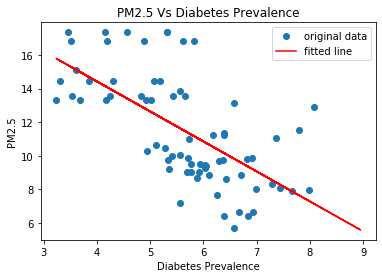

R-squared: 0.417331
slope confidence (95%): -1.785072 +/- 0.509305




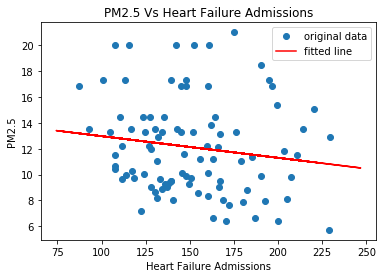

R-squared: 0.021770
slope confidence (95%): -0.016759 +/- 0.023492




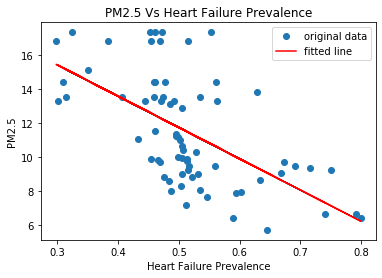

R-squared: 0.356584
slope confidence (95%): -18.407544 +/- 5.970516




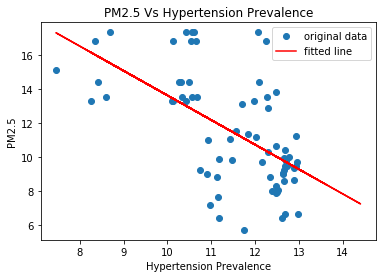

R-squared: 0.352178
slope confidence (95%): -1.447855 +/- 0.474158




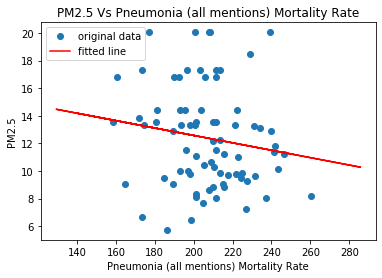

R-squared: 0.023396
slope confidence (95%): -0.026852 +/- 0.040180




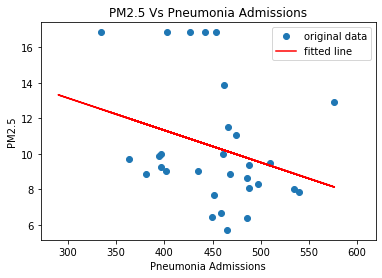

R-squared: 0.080780
slope confidence (95%): -0.018096 +/- 0.023139




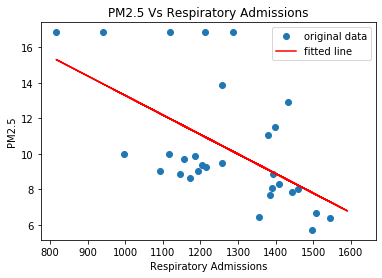

R-squared: 0.320381
slope confidence (95%): -0.010988 +/- 0.006066




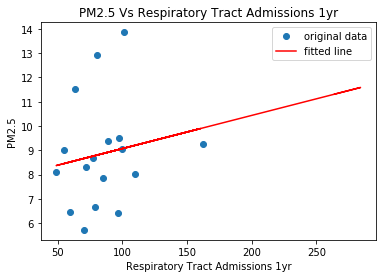

R-squared: 0.026619
slope confidence (95%): 0.013678 +/- 0.042836




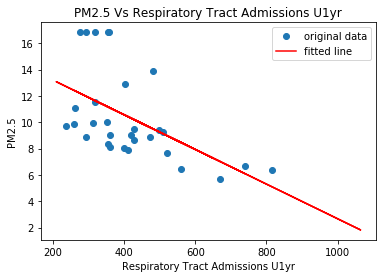

R-squared: 0.288083
slope confidence (95%): -0.013155 +/- 0.007839




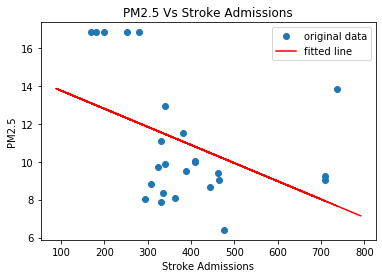

R-squared: 0.184493
slope confidence (95%): -0.009566 +/- 0.008411




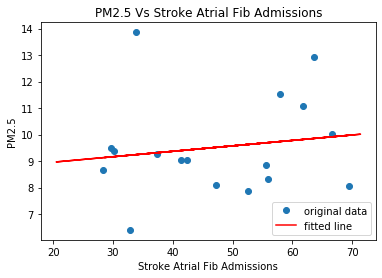

R-squared: 0.023237
slope confidence (95%): 0.020540 +/- 0.068966




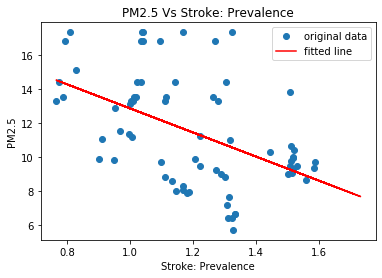

R-squared: 0.242267
slope confidence (95%): -7.097089 +/- 3.030697




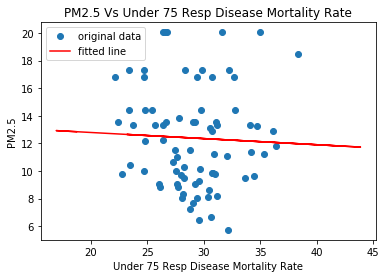

R-squared: 0.001848
slope confidence (95%): -0.044357 +/- 0.238743




In [286]:
for h in healthVpoll_wide[health_cols]:
    x = healthVpoll_wide[h].to_numpy()
    y = healthVpoll_wide['PM2.5'].to_numpy()

    mask = ~np.isnan(x) & ~np.isnan(y)

    res = stats.linregress(x[mask], y[mask])

    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
    plt.title("PM2.5 Vs {}".format( h))
    plt.xlabel(h)
    plt.ylabel("PM2.5")
    plt.legend()
    plt.show()
    PM25_R.append((h,res.rvalue**2))
    

    print(f"R-squared: {res.rvalue**2:.6f}")
    print(f"slope confidence (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
    print('\n')

In [287]:
print(sorted(PM25_R,key=lambda x: x[1], reverse=True)[0])
print(sorted(PM25_R,key=lambda x: x[1], reverse=False)[0])

('Diabetes Prevalence', 0.41733109256986073)
('Asthma Admissions Under 19yr', 0.0009213149139875227)


## Multiple Linear Regression

Assumptions 
* Testing different health indicators against PM10 and N20, as they are the most populated pollutants (and the least amount of points will be dropped across the dataset. PM2.5 and Ozone are missing from over 50% of the CCGs and Suplur dioxide is missing from more.


In [89]:
import pandas as pd
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
health_poll_wide = pd.read_csv('../data_final/health_pollution_final_wide.csv').drop('Unnamed: 0', axis =1)
health_poll_wide.drop(columns=['Unnamed: 0.1', 'Carbon monoxide', 'Nitric Oxide', 'Oxides of Nitrogen', 'Ozone', 'PM2.5', 'Sulphur dioxide', 'PM10 Particulate matter' ], inplace=True)
cols = [x.replace(' ', '_').replace('(', '').replace(')', '').replace('<', 'Over_').replace(':', '') for x in health_poll_wide.columns.tolist()]
health_poll_wide.columns = cols
health_poll_wide.head()

Year                Area_Name Radius_Location  heathrow_distance  \
0  2003   NHS Berkshire West CCG           Outer        49791.74229   
1  2003            NHS Brent CCG           Outer        16247.54245   
2  2003  NHS Buckinghamshire CCG           Outer        38818.06153   
3  2003          NHS Croydon CCG           Outer        28645.84070   
4  2003           NHS Ealing CCG           Inner        11465.53093   

            CCG_Poll_Map      LAT     LONG  \
0                Reading  51.4458 -1.16963   
1  No Pollution Readings  51.5644 -0.27568   
2  No Pollution Readings  51.7414 -0.80644   
3  No Pollution Readings  51.3660 -0.07761   
4                 Ealing  51.5244 -0.31405   

   Over_75_Coronary_Heart_Disease_Mortality_Rate  Asthma_Admissions_Over_19yr  \
0                                          57.82                          NaN   
1                                          76.04                          NaN   
2                                          51.21                          NaN   
3                                          65.63                          NaN   
4                                          82.91                          NaN   

   Asthma_Admissions_Under_19yr  Asthma_Mortality_Rate  Asthma_Prevalence  \
0                           NaN                    NaN                NaN   
1                           NaN                    NaN                NaN   
2                           NaN                    NaN                NaN   
3                           NaN                    NaN                NaN   
4                           NaN                    NaN                NaN   

   Atrial_Fibrillation_Prevalence  CHD_Admissions  CHD_Prevalence  \
0                             NaN         639.353             NaN   
1                             NaN             NaN             NaN   
2                             NaN         730.138             NaN   
3                             NaN             NaN             NaN   
4                             NaN         954.994             NaN   

   CKD_Prevalence  COPD_contributory_cause_Mortality_Rate  COPD_Admissions  \
0             NaN                                     NaN              NaN   
1             NaN                                     NaN              NaN   
2             NaN                                     NaN              NaN   
3             NaN                                     NaN              NaN   
4             NaN                                     NaN              NaN   

   COPD_Prevalence  Diabetes_Prevalence  Heart_Failure_Admissions  \
0              NaN                  NaN                   118.793   
1              NaN                  NaN                       NaN   
2              NaN                  NaN                   107.011   
3              NaN                  NaN                       NaN   
4              NaN                  NaN                   193.386   

   Heart_Failure_Prevalence  Hypertension_Prevalence  \
0                       NaN                      NaN   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                       NaN                      NaN   
4                       NaN                      NaN   

   Pneumonia_all_mentions_Mortality_Rate  Pneumonia_Admissions  \
0                                    NaN                   NaN   
1                                    NaN                   NaN   
2                                    NaN                   NaN   
3                                    NaN                   NaN   
4                                    NaN                   NaN   

   Respiratory_Admissions  Respiratory_Tract_Admissions_1yr  \
0                     NaN                               NaN   
1                     NaN                               NaN   
2                     NaN                               NaN   
3                     NaN                               NaN   
4

In [90]:
health_indicators = [
 'Over_75_Coronary_Heart_Disease_Mortality_Rate',
 'Asthma_Admissions_Over_19yr',
 'Asthma_Admissions_Under_19yr',
 'Asthma_Mortality_Rate',
 'Asthma_Prevalence',
 'Atrial_Fibrillation_Prevalence',
 'CHD_Admissions',
 'CHD_Prevalence',
 'CKD_Prevalence',
 'COPD_contributory_cause_Mortality_Rate',
 'COPD_Admissions',
 'COPD_Prevalence',
 'Diabetes_Prevalence',
 'Heart_Failure_Admissions',
 'Heart_Failure_Prevalence',
 'Hypertension_Prevalence',
 'Pneumonia_all_mentions_Mortality_Rate',
 'Pneumonia_Admissions',
 'Respiratory_Admissions',
 'Respiratory_Tract_Admissions_1yr',
 'Respiratory_Tract_Admissions_U1yr',
 'Stroke_Admissions',
 'Stroke_Atrial_Fib_Admissions',
 'Stroke_Prevalence',
 'Under_75_Resp_Disease_Mortality_Rate',]

In [94]:
tmp = health_poll_wide.copy()[['Over_75_Coronary_Heart_Disease_Mortality_Rate', 'Nitrogen_dioxide', 'PM10']].dropna()
# tmp.rename(columns={'Asthma Admissions Over 19yr': 'asthma', 'Nitrogen dioxide':'n20' }, inplace=True)

In [117]:
# https://gist.github.com/zhiyzuo/972b8b95e115c44d6805c929b7b4e2ca

# pay = B- + b1age + b2gender
model2 = 'Over_75_Coronary_Heart_Disease_Mortality_Rate~Nitrogen_dioxide + PM10'
lm2    = ols(formula = model2, data = tmp).fit()

# first attempt, couldn't get variables this way
print(lm2.summary())
# p_val_df = lm2.pvalues.reset_index().rename(columns={0:'p-values'})

# p_val_df['health_indicator'] = 'Over_75_Coronary_Heart_Disease_Mortality_Rate'

# p_val_pivot = p_val_df.pivot(
#     columns='index',
#     values = 'p-values',
#     index= 'health_indicator'
#     ).reset_index()


# p_val_pivot['r_squared'] = lm2.rsquared
# p_val_pivot['f_value'] = lm2.fvalue
# p_val_pivot.drop(columns='Intercept')
# p_val_pivot.rename(columns={'Nitrogen_dioxide': 'p_value_Nitrogen_dioxide', 'PM10': 'p_value_PM10'}, inplace=True)

# print(p_val_pivot)


# print(coef_df)
err_series = lm2.params - lm2.conf_int()[0]
coef_df = pd.DataFrame({'coef': lm2.params.values[1:],
                        'ci_err': err_series.values[1:],
                        'pvalue': lm2.pvalues.round(4).values[1:],
                        'varname': err_series.index.values[1:],
                       })


coef_df['health_indicator'] = 'Over_75_Coronary_Heart_Disease_Mortality_Rate'


coef_df_p1 =  coef_df[['health_indicator', 'varname', 'coef']].pivot(
    columns='varname',
    values = 'coef',
    index= 'health_indicator'
    ).reset_index().rename(columns={'Nitrogen_dioxide': 'coef_Nitrogen_dioxide', 'PM10': 'coef_PM10'})


coef_df_p2 =  coef_df[['health_indicator', 'varname', 'pvalue']].pivot(
    columns='varname',
    values = 'pvalue',
    index= 'health_indicator'
    ).reset_index().rename(columns={'Nitrogen_dioxide': 'p_value_Nitrogen_dioxide', 'PM10': 'p_value_PM10'})


final = pd.concat([coef_df_p1, coef_df_p2], axis=1)
final['F-Value'] = lm2.fvalue


print(final)

                                          OLS Regression Results                                         
Dep. Variable:     Over_75_Coronary_Heart_Disease_Mortality_Rate   R-squared:                       0.204
Model:                                                       OLS   Adj. R-squared:                  0.195
Method:                                            Least Squares   F-statistic:                     22.46
Date:                                           Sun, 07 Feb 2021   Prob (F-statistic):           2.07e-09
Time:                                                   01:51:39   Log-Likelihood:                -650.51
No. Observations:                                            178   AIC:                             1307.
Df Residuals:                                                175   BIC:                             1317.
Df Model:                                                      2                                         
Covariance Type:                              

In [137]:
stats_sig = {}
non_stats_sig = {}

list_o_test_frames = []



for indicator in health_indicators:
    print('Running regression for {0} against Nitrogen Dioxide and Flights'.format(indicator))
    tmp = health_poll_wide.copy()[[indicator, 'Nitrogen_dioxide', 'PM10']].dropna()

    model2 = '{0}~Nitrogen_dioxide + PM10'.format(indicator)
    lm2    = ols(formula = model2, data = tmp).fit()

    err_series = lm2.params - lm2.conf_int()[0]
    coef_df = pd.DataFrame({'coef': lm2.params.values[1:],
                            'ci_err': err_series.values[1:],
                            'pvalue': lm2.pvalues.round(4).values[1:],
                            'varname': err_series.index.values[1:],
                           })

    coef_df['health_indicator'] = indicator

    coef_df_p1 =  coef_df[['health_indicator', 'varname', 'coef']].pivot(
        columns='varname',
        values = 'coef',
        index= 'health_indicator'
        ).reset_index().rename(columns={'Nitrogen_dioxide': 'coef_Nitrogen_dioxide', 'PM10': 'coef_PM10'})

    coef_df_p2 =  coef_df[['health_indicator', 'varname', 'pvalue']].pivot(
        columns='varname',
        values = 'pvalue',
        index= 'health_indicator'
        ).reset_index().rename(columns={'Nitrogen_dioxide': 'p_value_Nitrogen_dioxide', 'PM10': 'p_value_PM10'})

    final = pd.concat([coef_df_p1, coef_df_p2], axis=1)
    final['F-Value'] = lm2.fvalue
    final['R_squared'] = lm2.rsquared

    list_o_test_frames.append(final)
    
multi_regression = pd.concat(list_o_test_frames, axis=0)
multi_regression= multi_regression.reset_index().drop(columns='index')


Running regression for Over_75_Coronary_Heart_Disease_Mortality_Rate against Nitrogen Dioxide and Flights
Running regression for Asthma_Admissions_Over_19yr against Nitrogen Dioxide and Flights
Running regression for Asthma_Admissions_Under_19yr against Nitrogen Dioxide and Flights
Running regression for Asthma_Mortality_Rate against Nitrogen Dioxide and Flights
Running regression for Asthma_Prevalence against Nitrogen Dioxide and Flights
Running regression for Atrial_Fibrillation_Prevalence against Nitrogen Dioxide and Flights
Running regression for CHD_Admissions against Nitrogen Dioxide and Flights
Running regression for CHD_Prevalence against Nitrogen Dioxide and Flights
Running regression for CKD_Prevalence against Nitrogen Dioxide and Flights
Running regression for COPD_contributory_cause_Mortality_Rate against Nitrogen Dioxide and Flights
Running regression for COPD_Admissions against Nitrogen Dioxide and Flights
Running regression for COPD_Prevalence against Nitrogen Dioxide an

In [138]:
multi_regression

varname                               health_indicator  coef_Nitrogen_dioxide  \
0        Over_75_Coronary_Heart_Disease_Mortality_Rate               0.094170   
1                          Asthma_Admissions_Over_19yr               1.691660   
2                         Asthma_Admissions_Under_19yr              -0.333964   
3                                Asthma_Mortality_Rate              -0.015917   
4                                    Asthma_Prevalence              -0.020233   
5                       Atrial_Fibrillation_Prevalence              -0.005335   
6                                       CHD_Admissions               0.218578   
7                                       CHD_Prevalence              -0.010153   
8                                       CKD_Prevalence              -0.039556   
9               COPD_contributory_cause_Mortality_Rate               0.586616   
10                                     COPD_Admissions               4.518560   
11                                     COPD_Prevalence              -0.000917   
12                                 Diabetes_Prevalence               0.023626   
13                            Heart_Failure_Admissions               2.031553   
14                            Heart_Failure_Prevalence              -0.001268   
15                             Hypertension_Prevalence              -0.027880   
16               Pneumonia_all_mentions_Mortality_Rate              -0.247525   
17                                Pneumonia_Admissions               3.324637   
18                              Respiratory_Admissions              11.441579   
19                    Respiratory_Tract_Admissions_1yr              -0.242124   
20                   Respiratory_Tract_Admissions_U1yr              -0.896342   
21                                   Stroke_Admissions              -2.291161   
22                        Stroke_Atrial_Fib_Admissions               0.144486   
23                                   Stroke_Prevalence              -0.007319   
24                Under_75_Resp_Disease_Mortality_Rate               0.222156   

varname  coef_PM10                               health_indicator  \
0         1.132061  Over_75_Coronary_Heart_Disease_Mortality_Rate   
1        -1.851225                    Asthma_Admissions_Over_19yr   
2         0.227869                   Asthma_Admissions_Under_19yr   
3         0.028453                          Asthma_Mortality_Rate   
4         0.052061                              Asthma_Prevalence   
5        -0.024204                 Atrial_Fibrillation_Prevalence   
6         8.898984                                 CHD_Admissions   
7         0.016969                                 CHD_Prevalence   
8         0.088854                                 CKD_Prevalence   
9        -1.036435         COPD_contributory_cause_Mortality_Rate   
10       -4.225002                                COPD_Admissions   
11       -0.010785                                COPD_Prevalence   
12       -0.121039                            Diabetes_Prevalence   
13       -4.604132                       Heart_Failure_Admissions   
14       -0.006427                       Heart_Failure_Prevalence   
15        0.002215                        Hypertension_Prevalence   
16        2.835962          Pneumonia_all_mentions_Mortality_Rate   
17       -8.441207                           Pneumonia_Admissions   
18      -30.331138                         Respiratory_Admissions   
19        1.050014               Respiratory_Tract_Admissions_1yr   
20      -14.605550              Respiratory_Tract_Admissions_U1yr   
21       -7.481618                              Stroke_Admissions   
22       -0.752574                   Stroke_Atrial_Fib_Admissions   
23        0.005664                              Stroke_Prevalence   
24       -0.113222           Under_75_Resp_Disease_Mortality_Rate   

varname  p_value_Nitrogen_dioxide  p_value_PM10    F-Value  R_squared  
0                         

In [139]:
multi_regression.to_csv('data_treatment_model_ready/health_pollution_multi_regression.CSV', encoding='utf-8')